In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import sklearn
import os
sns.set(style='white')

In [2]:
df = pd.read_pickle('mouse_features_paper_sklearn_with_peptideranker.pickle')

## Figure 3b (degradation)

- Suggestion from reviewer: plot number of peptides per protein as a function of protein length
- Plot the number of fragments (shorter) per known peptide as a function of peptide length
- For our data: plot percentage of abundance of all fragments (length x or shorter) originating from the REAL peptide (the longest one) as a function of peptide length (try also with protein length). 


In [14]:
df = pd.read_pickle('mouse_features_paper_sklearn_with_peptideranker.pickle')
df_ileum = df.loc['Mouse Ileum']
df_ileum['Annotations', 'Length'] = df_ileum['Annotations', 'Sequence'].str.len()

<ipython-input-14-8c2bdd154b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ileum['Annotations', 'Length'] = df_ileum['Annotations', 'Sequence'].str.len()


In [16]:
df_ileum.reset_index()['protein_id'].drop_duplicates().to_csv('proteins.txt.tmp', index=False)
# copy this into uniprot and retrieve
list_id = 'M20220331F248CABF64506F29A91F8037F07B67D148592DT'
df_proteins = pd.read_csv(f'https://www.uniprot.org/uniprot/?query=yourlist:{list_id}&sort=yourlist:{list_id}&columns=yourlist({list_id}),id,entry%20name,reviewed,protein%20names,genes,organism,length,feature(MODIFIED%20RESIDUE),feature(PEPTIDE),lineage(CLASS),comment(POST-TRANSLATIONAL%20MODIFICATION),sequence,comment(SUBCELLULAR%20LOCATION)&format=tab#', sep='\t')
df_proteins = df_proteins.set_index('Entry')

In [17]:
peptide_counts = df_ileum.groupby('protein_id').size()
peptide_counts.name = 'count'
df_proteins = df_proteins.join(peptide_counts)

df_proteins = df_proteins.loc[~df_proteins['Length'].isna()]
df_proteins = df_proteins.loc[~df_proteins['count'].isna()]

(0.0, 10000.0)

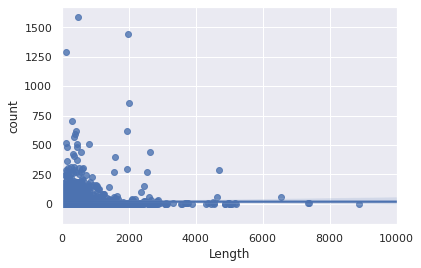

In [18]:
sns.regplot(data=df_proteins, x='Length', y='count')
plt.xlim(0, 10000)
#spearmanr(df_proteins['Length'], df_proteins['count'])

In [19]:
# Ulriks alternative
# •	Plot the number of fragments (shorter) per known peptide as a function of peptide length
# •	For our data: plot percentage of abundance of all fragments (length x or shorter) originating from the REAL peptide (the longest one) as a function of peptide length (try also with protein length). 
 
for idx, row in df_ileum.loc[df_ileum['Annotations', 'Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df_ileum.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df_ileum.loc[idx, ('Annotations', 'Fragment count')] = fragment_count
        

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2914: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Annotations', 'Fragment count')">

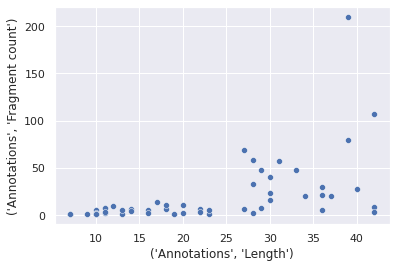

In [20]:
sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count'])

In [21]:
df = pd.read_pickle('../../fegt/paper/mouse_features_paper_sklearn.pickle')
df = df.loc[df['Annotations', 'Known']]
known_peptides = set(df['Annotations','Sequence'])

In [22]:
larraufie_gastrointestinal = '../datasets/larraufie_gastrointestinal.tsv'
larraufie_enteroendocrine = '../datasets/larraufie_enteroendocrine.tsv'
galvin_enteroendocrine = '../datasets/galvin_enteroendocrine.tsv'


df = pd.read_csv(larraufie_gastrointestinal, sep='\t')
df = df.set_index(['accession', 'start', 'end'])
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count


df_larraufie_gastrointestinal = df


df = pd.read_csv(larraufie_enteroendocrine, sep='\t')
df = df.set_index(['accession', 'start', 'end'])
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count


df_larraufie_enteroendocrine = df

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2914: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [23]:
df = pd.read_csv(galvin_enteroendocrine, sep='\t')
df = df.set_index(['Protein Accession', 'Start', 'End'])
pepseq = df['Peptide sequence'].str.replace(r"\([^A-Z]*\)","", regex=True) # removes (xx.xx) mass annotations
df['pepseq'] = pepseq.str.slice(2,-2)# remove leading and trailing X. .X
df['Length'] = df['pepseq'].str.len()

df['Known'] = False
for idx, row in df.iterrows():
    if row['pepseq'] in known_peptides:
        df.loc[idx, 'Known'] = True



for idx, row in df.loc[df['Known']].iterrows():
    protein_id, start_pre, stop_pre = idx

    fragment_count = 0
    for sub_idx, sub_row in df.loc[protein_id].iterrows():
        start, stop = sub_idx

        # require: complete overlap.
        if start>= start_pre and stop <= stop_pre:
            fragment_count +=1

    df.loc[idx, 'Fragment count'] = fragment_count

    df_galvin_enteroendocrine = df



/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/IPython/core/async_helpers.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


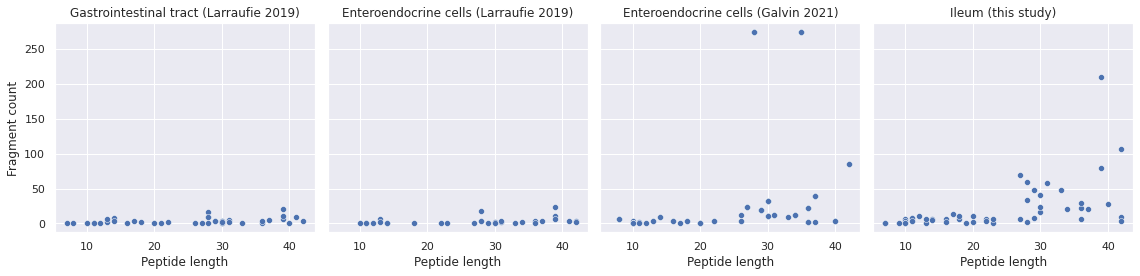

In [24]:
fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)
sns.set()
sns.scatterplot(data=df_larraufie_gastrointestinal.loc[df_larraufie_gastrointestinal['Known']], x='Length', y='Fragment count', ax= ax[0])
sns.scatterplot(data=df_larraufie_enteroendocrine.loc[df_larraufie_enteroendocrine['Known']], x='Length', y='Fragment count', ax= ax[1])
sns.scatterplot(data=df_galvin_enteroendocrine.loc[df_galvin_enteroendocrine['Known']], x='Length', y='Fragment count', ax= ax[2])
sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count'], ax=ax[3])

ax[0].set_title('Gastrointestinal tract (Larraufie 2019)')
ax[1].set_title('Enteroendocrine cells (Larraufie 2019)')
ax[2].set_title('Enteroendocrine cells (Galvin 2021)')
ax[3].set_title('Ileum (this study)')

for a in ax:
    a.set_ylabel('Fragment count')
    a.set_xlabel('Peptide length')

plt.tight_layout()

In [25]:
df_ileum['Annotations', 'Fragment count log'] = np.log10(df_ileum['Annotations', 'Fragment count'])
df_larraufie_gastrointestinal['Fragment count log'] = np.log10(df_larraufie_gastrointestinal['Fragment count'])
df_larraufie_enteroendocrine['Fragment count log'] = np.log10(df_larraufie_enteroendocrine['Fragment count'])
df_galvin_enteroendocrine['Fragment count log'] = np.log10(df_galvin_enteroendocrine['Fragment count'])

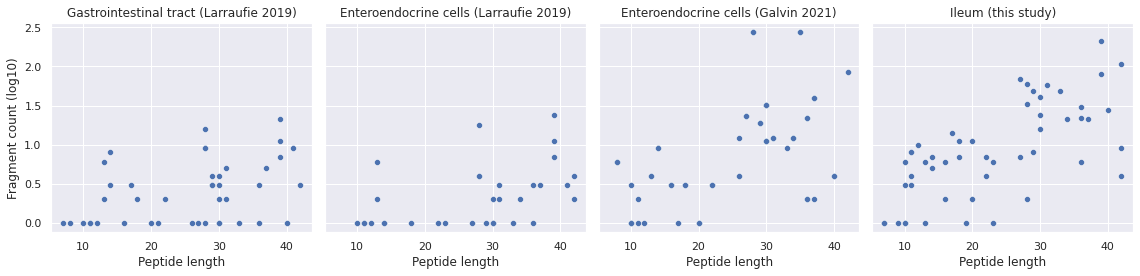

In [27]:
fig, ax = plt.subplots(1,4, figsize=(16,4), sharey=True, sharex=True)

sns.scatterplot(data=df_larraufie_gastrointestinal.loc[df_larraufie_gastrointestinal['Known']], x='Length', y='Fragment count log', ax= ax[0])
sns.scatterplot(data=df_larraufie_enteroendocrine.loc[df_larraufie_enteroendocrine['Known']], x='Length', y='Fragment count log', ax= ax[1])
sns.scatterplot(data=df_galvin_enteroendocrine.loc[df_galvin_enteroendocrine['Known']], x='Length', y='Fragment count log', ax= ax[2])
sns.scatterplot(x = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Length'], y = df_ileum.loc[df_ileum['Annotations', 'Known']]['Annotations', 'Fragment count log'], ax=ax[3])


ax[0].set_title('Gastrointestinal tract (Larraufie 2019)')
ax[1].set_title('Enteroendocrine cells (Larraufie 2019)')
ax[2].set_title('Enteroendocrine cells (Galvin 2021)')
ax[3].set_title('Ileum (this study)')

for a in ax:
    a.set_ylabel('Fragment count (log10)')
    a.set_xlabel('Peptide length')

plt.tight_layout()

plt.savefig(f"figures/paper/figure_3b.svg")
plt.savefig(f"figures/paper/figure_3b.pdf")

## Figure 4c

In [2]:
sns.set(style='white')

/isdata/winthergrp/zpf738/miniconda3/envs/ppv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/isdata/winthergrp/zpf738/miniconda3/envs/ppv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/isdata/winthergrp/zpf738/miniconda3/envs/ppv/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from versi

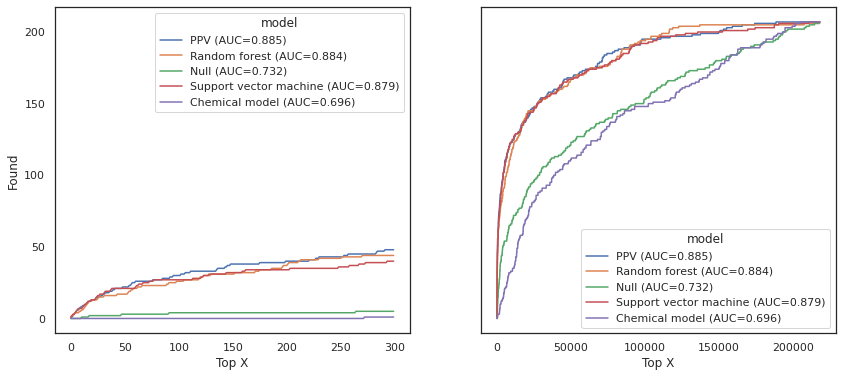

In [53]:
def make_features_numerical(df: pd.DataFrame) -> pd.DataFrame:
    '''Cannot train on boolean values.'''
    df = df.copy()
    for column in df.columns:
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)

    return df

df = pd.read_pickle('mouse_features_paper_sklearn.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]

def add_test_probabilities(df, cv_run: str, results_dir: str, folds = [0,1,2,3,4], model_type='sklearn_any'):

    for test in folds:
        # extract the features.
        df_X_orig = df.loc[df[('Annotations', 'Fold')] == test, feature_columns]
        df_X = make_features_numerical(df_X_orig)
        X =  df_X.values

        all_probs = []
        # predict from all the test models and average probabilities.
        for val in folds:
            if val == test:
                continue

            model = pickle.load(open(os.path.join(results_dir, cv_run, f'model_t{test}_v{val}.pkl'), 'rb'))
            
            # TODO adjust for SVM and bayes logreg
            if model_type == 'svc':
                probs = model.decision_function(X)
            elif model_type == 'bayes':
                probs = model.predict(df_X_orig)
            else:
                probs = model.predict_proba(X)[:, 1]
            
            all_probs.append(probs)

        probs = np.stack(all_probs).mean(axis=0)
        df.loc[df[('Annotations', 'Fold')] == test, ('Predictions', cv_run)] = probs


results_dir = 'nested_cv'
exclude_features = [
    (    'MS Count',             'start'),
    (    'MS Count',             'stop'),
    (    'MS Frequency',        'protein_coverage'),
    (    'MS Frequency',        'cluster_coverage'),
]
feature_columns = df.columns[ (df.columns.get_level_values(0).str.startswith('MS')) & ~(df.columns.isin(exclude_features))]
add_test_probabilities(df, 'cv_f_logreg', results_dir )
add_test_probabilities(df, 'cv_max_42aa', results_dir )
add_test_probabilities(df, 'cv_max_pos_30aa', results_dir )
#add_test_probabilities(df, 'cv_f_logreg_smote', results_dir )
add_test_probabilities(df, 'cv_rf', results_dir )
#df[('Predictions', 'rf_old')] = df[('Predictions', 'cv_rf')]
add_test_probabilities(df, 'cv_svc', results_dir, model_type='svc' )
#add_test_probabilities(df, 'cv_bayes_logreg', results_dir, model_type='bayes')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('Chemical')]
add_test_probabilities(df, 'cv_chemical', results_dir )

#results_dir = 'bayes_opt'
#feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
#add_test_probabilities(df, 'cv_elasticnet', results_dir )
#add_test_probabilities(df, 'cv_rf', results_dir )


def make_plottable(prediction, targets, source, model_name, auc=True):
    plot_data = pd.DataFrame({"prediction": prediction, "Target": targets.astype(int)})
    plot_data = plot_data.sort_values(by="prediction")[::-1]
    plot_data["Top X"] = np.arange(targets.shape[0])
    plot_data["Found"] = plot_data["Target"].cumsum()
    plot_data["source"] = source
    if auc:
        auc = sklearn.metrics.roc_auc_score(targets.astype(int),  prediction)
        model_name = "{} (AUC={:.3f})".format(model_name, auc)
    plot_data["model"] = model_name
    return plot_data

df_plot = pd.concat((
    make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV"),
    #make_plottable(df[('Predictions', 'cv_bayes_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Bayesian logistic regression"),
    make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest"),
    make_plottable(df[('Annotations', 'Intensity')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Null"),
    make_plottable(df[('Predictions', 'cv_svc')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Support vector machine"),
    #make_plottable(df[('Predictions', 'cv_f_logreg_smote')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Logistic regression w/ SMOTE"),
    make_plottable(df[('Predictions', 'cv_chemical')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Chemical model"),
)).reset_index(drop=True) # need to reset the index for seaborn to work correctly.


fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=True)
# fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1)
# sns.lineplot(x="Top X", y="Found", style="model", data=df[df["Top X"] < 1000], ax=ax2)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)
#g.axes.scatter(n_lpv, n_lpv_true, s=50, c='b', marker='x')
#g.axes.annotate('LPV', (n_lpv, n_lpv_true), xycoords='data',
#                xytext=(n_lpv * 1.25, n_lpv_true * 0.75), textcoords='data',
#                arrowprops=dict(arrowstyle= '->', color='k', lw=3.5, ls='--'))
#g.figure.savefig("figures/paper/figure_4c_complete_curve.png")
#g.figure.savefig("figures/paper/figure_4c_complete_curve.svg")

In [54]:
df['Annotations', 'Length'] = pd.cut(df['Annotations']['Sequence'].str.len(), [0,5,10,15,20,25,30,35,40,45,50,55,60,65], labels=[5,10,15,20,25,30,35,40,45,50,55,60,65])

In [55]:
#O88492_1134_1178
df.loc['Mouse Epifat', 'O88492', 1134, 1178]['Predictions']

cv_f_logreg        0.166023
cv_max_42aa        0.195583
cv_max_pos_30aa    0.032232
cv_rf               0.07248
cv_svc            -0.916084
cv_chemical        0.000766
Name: (Mouse Epifat, O88492, 1134, 1178), dtype: object

<AxesSubplot:xlabel='Length', ylabel='cv_max_pos_30aa'>

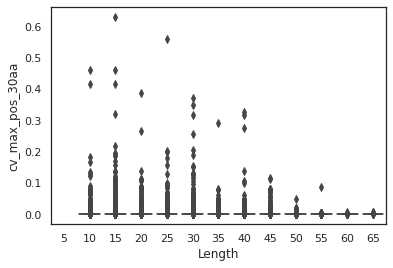

In [57]:
sns.boxplot(x=df['Annotations']['Length'], y= df['Predictions']['cv_max_pos_30aa'])

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(


<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Predictions', 'cv_f_logreg')">

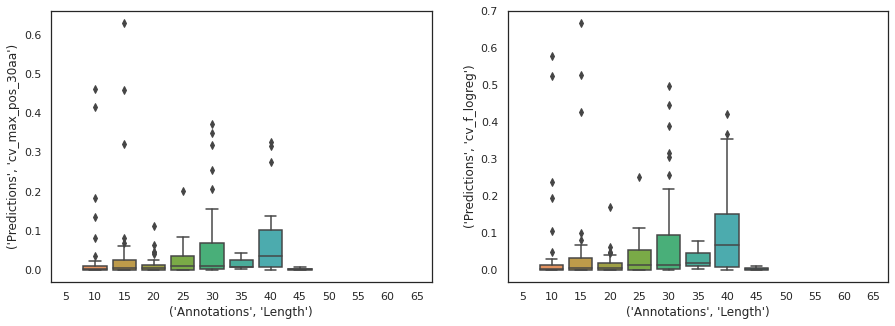

In [62]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df.loc[df['Annotations', 'Known']], x=('Annotations', 'Length'), y=('Predictions', 'cv_max_pos_30aa'))
plt.subplot(1,2,2)
sns.boxplot(data = df.loc[df['Annotations', 'Known']], x=('Annotations', 'Length'), y=('Predictions', 'cv_f_logreg'))

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(


<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Predictions', 'cv_f_logreg')">

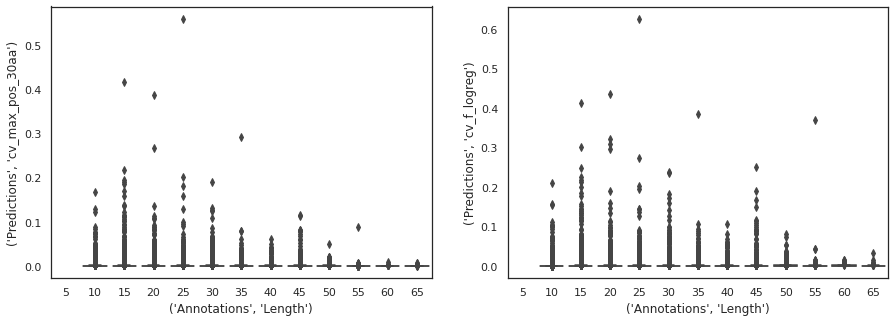

In [66]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df.loc[~df['Annotations', 'Known'].astype(bool)], x=('Annotations', 'Length'), y=('Predictions', 'cv_max_pos_30aa'))
plt.subplot(1,2,2)
sns.boxplot(data = df.loc[~df['Annotations', 'Known'].astype(bool)], x=('Annotations', 'Length'), y=('Predictions', 'cv_f_logreg'))

SpearmanrResult(correlation=0.9637268847795162, pvalue=1.1577332117312932e-21)

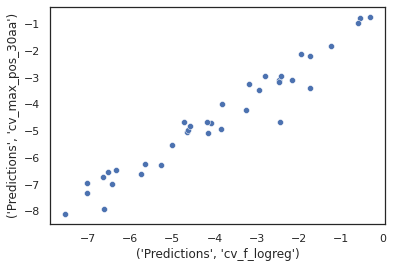

In [75]:
# sns.scatterplot(data = df.loc[df['Annotations', 'Known'].astype(bool) & (df['Annotations','Sequence'].str.len()>30)], x=('Predictions', 'cv_f_logreg'), y=('Predictions', 'cv_max_pos_30aa'))

from scipy.special import logit

x = logit(df.loc[df['Annotations', 'Known'].astype(bool) & (df['Annotations','Sequence'].str.len()>30)]['Predictions', 'cv_f_logreg'])
y = logit(df.loc[df['Annotations', 'Known'].astype(bool) & (df['Annotations','Sequence'].str.len()>30)]['Predictions', 'cv_max_pos_30aa'])

sns.scatterplot(x=x, y=y)
spearmanr(x,y)

In [71]:
from scipy.stats import spearmanr

In [50]:
df['Annotations', 'difference'] = df['Predictions', 'cv_f_logreg'] -df['Predictions', 'cv_max_42aa']

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(


<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Annotations', 'difference')">

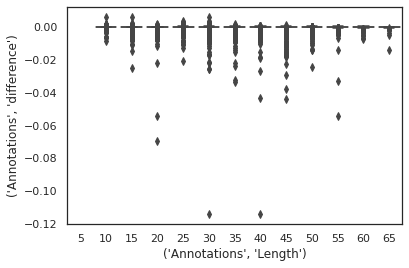

In [49]:
sns.boxplot(data = df, x=('Annotations', 'Length'), y=('Annotations', 'difference'))

In [36]:
#sns.boxplot(data = df, x=('Annotations', 'Length'), y=('Annotations', 'difference'))
sns.boxplot(data=df, y=('Predictions', 'cv_f_logreg'), x=('Annotations', 'Length'), whis=100)

AttributeError: 'bool' object has no attribute 'all'

In [33]:
df.nlargest(300, ('Annotations', 'difference'))['Annotations']

Known  Cluster     Intensity  \
campaign_id  protein_id start stop                                 
Mouse Brain  O88935     144   151   False        3  4.105337e+09   
             P17751     52    66    False        1  9.792391e+07   
             P32648     81    107    True        2  1.137757e+10   
Mouse Ileum  Q9QXK8     144   166    True        3  1.199336e+09   
             P32648     81    107    True        2  4.278911e+09   
...                                   ...      ...           ...   
Mouse Epifat Q8C5N3     214   221   False        1  2.223011e+06   
Mouse Brain  Q64387     141   157    True        3  2.159256e+09   
Mouse Ileum  Q0VG18     94    120   False        3  5.888774e+08   
Mouse Scfat  Q61838     1356  1370  False        6  4.878341e+08   
Mouse Brain  Q3UMU9     2     13    False        1  5.974471e+09   

                                                       Sequence N Flanking  \
campaign_id  protein_id start stop                                           
Mouse Brain  O88935     144   151                      EQAEFSDL       DIKV   
             P17751     52    66                APTRKFFVGGNWKMN       PGTM   
             P32648     81    107   HADGVFTSDYSRLLGQISAKKYLESLI       RNAR   
Mouse Ileum  Q9QXK8     144   166       FKAEYQSPSVGQSKGYFLFRPRN       RMKR   
             P32648     81    107   HADGVFTSDYSRLLGQISAKKYLESLI       RNAR   
...                                                         ...        ...   
Mouse Epifat Q8C5N3     214   221                      AALVAIIN       THVY   
Mouse Brain  Q64387     141   157             FGGFTGARKSARKLANQ       LQKR   
Mouse Ileum  Q0VG18     94    120   KGGQSNEALELEEKESSDEERGKKTAL       KVDR   
Mouse Scfat  Q61838     1356  1370              GKAPFALQVNTLPLN       PVAD   
Mouse Brain  Q3UMU9     2     13                   PHAFKPGDLVFA       ___M   

                                   C Flanking    LPV  Fold  difference  
campaign_id  protein_id start stop                                      
Mouse Brain  O88935     144   151        NLVA   True     3    0.005953  
             P17751     52    66         GRKK   True     2    0.005788  
             P32648     81    107        GKRI   True     2    0.005643  
Mouse Ileum  Q9QXK8     144   166        GKRS   True     4    0.003432  
             P32648     81    107        GKRI   True     2    0.003160  
...                                       ...    ...   ...         ...  
Mouse Epifat Q8C5N3     214   221        SKFP   True     3    0.000259  
Mouse Brain  Q64387     141   157        KRFS   True     4    0.000259  
Mouse Ileum  Q0VG18     94    120        ____   True     4    0.000259  
Mouse Scfat  Q61838     1356  1370       FDKA  False     3    0.000258  
Mouse Brain  Q3UMU9     2     13         KMKG  False     3    0.000258  

[300 rows x 9 columns]

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/seaborn/categorical.py:406: PerformanceWarning: indexing past lexsort depth may impact performance.
  self.establish_variables(x, y, hue, data, orient, order, hue_order)
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/series.py:1884: PerformanceWarning: indexing past lexsort depth may impact performance.
  return SeriesGroupBy(


<AxesSubplot:xlabel="('Annotations', 'Length')", ylabel="('Predictions', 'cv_f_logreg')">

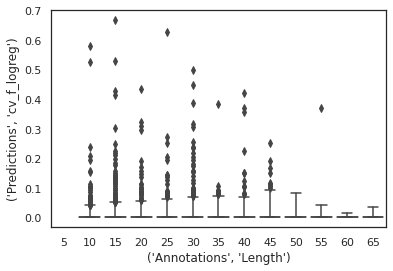

In [44]:
sns.boxplot(data=df, y=('Predictions', 'cv_f_logreg'), x=('Annotations', 'Length'), whis=100)
# Mouse uniprot distribution
# 5     11
# 10    29
# 15    28
# 20    24
# 25    33
# 30    38
# 35    40
# 40    29
# 45    10
# 50     7
# 55     0
# 60     0
# 65     0
# Name: coordinates, dtype: int64

In [7]:
n_lpv = df['Annotations','LPV'].sum()
n_lpv_true = (df['Annotations','LPV'].astype(bool) & df['Annotations', 'Known'].astype(bool)).sum()

In [9]:
obs_data = pd.read_pickle('mouse_features_paper_sklearn.pickle')
example_peptide = obs_data.loc['Mouse Scfat', 'P01942', 2, 29]
fold = example_peptide['Annotations']['Fold']
print(fold)
scores = []
for v in range(5):
    if not fold ==v:
        model = pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{fold}_v{v}.pkl'), 'rb'))
        scores.append(model.named_steps['scaler'].transform(pd.DataFrame(example_peptide).T[feature_columns]).squeeze())
        print(model.predict_proba(example_peptide[feature_columns].values.reshape(1, -1)))

zscores_hb = pd.DataFrame(scores, columns=feature_columns)
zscores_hb.columns = [' '.join(col).strip() for col in zscores_hb.columns.values]


obs_data = pd.read_pickle('mouse_features_paper.pickle')
example_peptide = obs_data.loc['Mouse Scfat', 'P57774', 29, 64]
fold = example_peptide['Annotations']['Fold']
print(fold)
scores = []
for v in range(5):
    if not fold ==v:
        model = pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{fold}_v{v}.pkl'), 'rb'))
        scores.append(model.named_steps['scaler'].transform(pd.DataFrame(example_peptide).T[feature_columns]).squeeze())
        print(model.predict_proba(example_peptide[feature_columns].values.reshape(1, -1)))

zscores_ne = pd.DataFrame(scores, columns=feature_columns)
zscores_ne.columns = [' '.join(col).strip() for col in zscores_ne.columns.values]

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. A

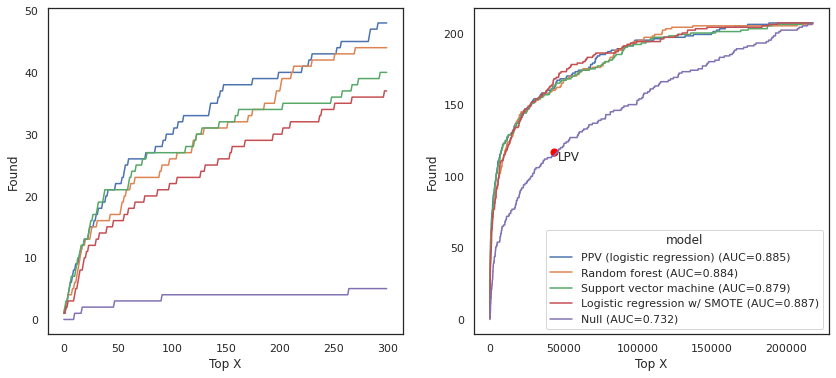

In [20]:
df_plot = pd.concat((
    make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV (logistic regression)"),
    make_plottable(df[('Predictions', 'cv_bayes_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Bayesian logistic regression"),
    make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest"),
    make_plottable(df[('Predictions', 'cv_svc')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Support vector machine"),
    make_plottable(df[('Predictions', 'cv_f_logreg_smote')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Logistic regression w/ SMOTE"),
    #make_plottable(df[('Predictions', 'cv_chemical')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Chemical model"),

    make_plottable(df[('Predictions', 'cv_elasticnet')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Elastic net"),
    make_plottable(df[('Annotations', 'Intensity')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Null"),
    #make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest bayes opt"),
    #make_plottable(df[('Predictions', 'PeptideRanker')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PeptideRanker"),
)).reset_index(drop=True) # need to reset the index for seaborn to work correctly.

fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=False)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1, legend=False)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)

g.axes.scatter(n_lpv, n_lpv_true, s=50, c='red', marker='o')
g.axes.annotate('LPV', (n_lpv, n_lpv_true), xycoords='data',
                xytext=(n_lpv * 1.05, n_lpv_true * 0.95), textcoords='data',
                )#arrowprops=dict(arrowstyle= '->', color='k', lw=3.5, ls='--'))

g.figure.savefig("figures/supplement/roc_curves_ml_models.png")
g.figure.savefig("figures/supplement/roc_curves_ml_models.svg")

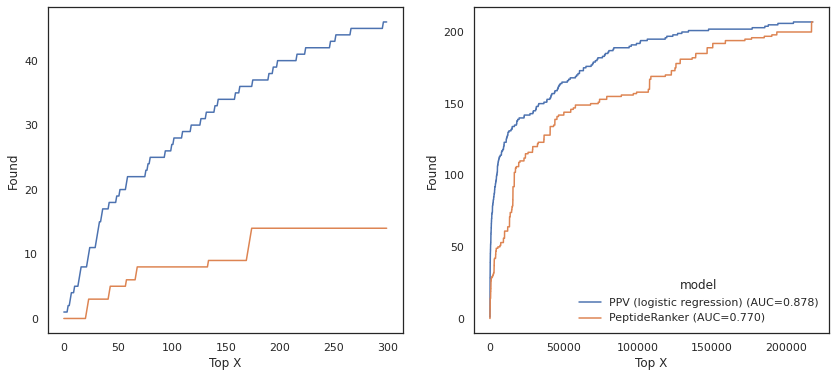

In [35]:
df_plot = pd.concat((
    make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV (logistic regression)"),
    #make_plottable(df[('Predictions', 'cv_bayes_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Bayesian logistic regression"),
    #make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest"),
    #make_plottable(df[('Predictions', 'cv_svc')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Support vector machine"),
    #make_plottable(df[('Predictions', 'cv_f_logreg_smote')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Logistic regression w/ SMOTE"),
    #make_plottable(df[('Predictions', 'cv_chemical')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Chemical model"),

    #make_plottable(df[('Predictions', 'cv_elasticnet')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Elastic net"),
    #make_plottable(df[('Annotations', 'Intensity')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Null"),
    #make_plottable(df[('Predictions', 'cv_rf')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "Random forest bayes opt"),
    make_plottable(df[('Predictions', 'PeptideRanker')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PeptideRanker"),
)).reset_index(drop=True) # need to reset the index for seaborn to work correctly.

fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=False)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1, legend=False)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)

g.figure.savefig("figures/supplement/roc_curves_ppv_peptideranker.png")
g.figure.savefig("figures/supplement/roc_curves_ppv_peptideranker.svg")

In [36]:
def make_plottable(prediction, targets, source, model_name, auc=True):
    plot_data = pd.DataFrame({"prediction": prediction, "Target": targets.astype(int)})
    plot_data = plot_data.sort_values(by="prediction")[::-1]
    plot_data["Top X"] = np.arange(targets.shape[0])
    plot_data["Found"] = plot_data["Target"].cumsum()
    plot_data["source"] = source
    if auc:
        # make AUC on top 300
        #auc = sklearn.metrics.roc_auc_score(plot_data["Target"][plot_data["Top X"]<300].astype(int), plot_data["prediction"][plot_data["Top X"]<300])#targets.astype(int),  prediction)
        auc = sklearn.metrics.roc_auc_score(targets.astype(int),  prediction)
        model_name = "{} (AUC={:.3f})".format(model_name, auc)
    plot_data["model"] = model_name
    return plot_data

df = pd.read_pickle('mouse_features_paper.pickle')
results_dir = 'nested_cv'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )

df_plot = pd.concat((
    make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV"),
)).reset_index(drop=True) # need to reset the index for seaborn to work correctly.

In [37]:
df = pd.read_pickle('mouse_features_paper_assembly.pickle')
results_dir = 'nested_cv_assembly'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )
df_plot_assembly = make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV assembly")

In [38]:
df_plot = pd.concat([df_plot, df_plot_assembly]).reset_index(drop=True)

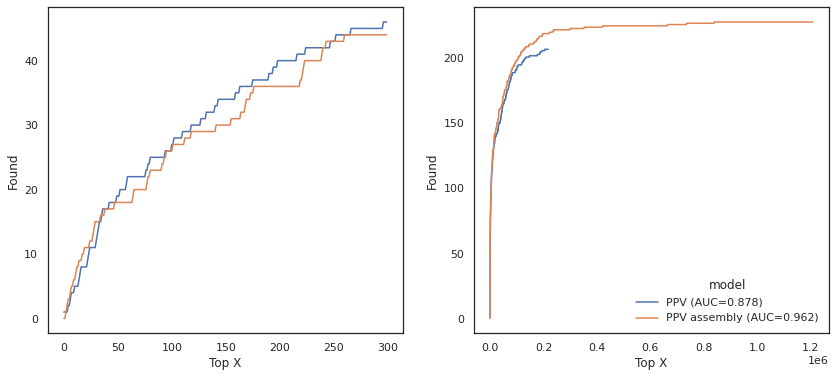

In [39]:
fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=False)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1, legend=False)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)

g.figure.savefig("figures/supplement/roc_curves_ppv_assembly.png")
g.figure.savefig("figures/supplement/roc_curves_ppv_assembly.svg")

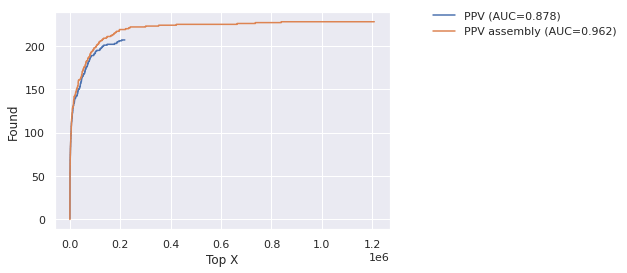

In [26]:
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot)
plt.legend(bbox_to_anchor=(1.1, 1.05))


# plt.savefig(f"figures/paper/figure_4c.svg")
# plt.savefig(f"figures/paper/figure_4c.pdf")


In [160]:
df = pd.read_pickle('mouse_features_paper_assembly.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
results_dir = 'nested_cv_assembly'
add_test_probabilities(df, 'cv_f_logreg', results_dir )
plot_data = make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV assembly (logistic regression)")

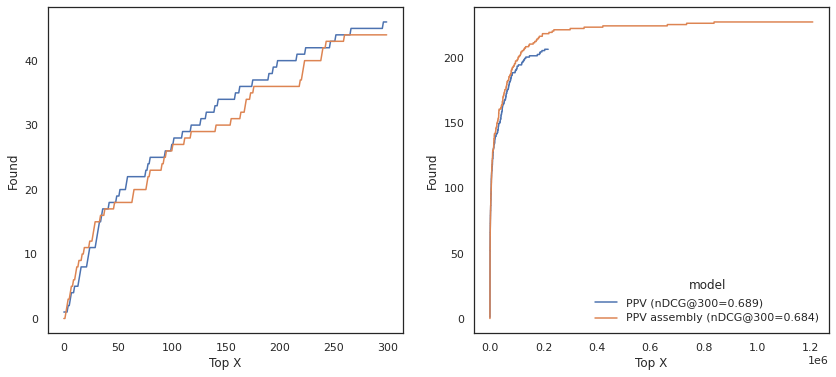

In [124]:
df = pd.read_pickle('mouse_features_paper_assembly.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
results_dir = 'nested_cv_assembly'
add_test_probabilities(df, 'cv_f_logreg', results_dir )
df_plot_assembly = make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV assembly")

df = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
results_dir = 'nested_cv'
add_test_probabilities(df, 'cv_f_logreg', results_dir )
df_plot = make_plottable(df[('Predictions', 'cv_f_logreg')].values, df[('Annotations', 'Known')].cat.codes.values, "Observed", "PPV")

df_plot_assembly['Top X %'] = df_plot_assembly['Top X'] / len(df_plot_assembly) * 100
df_plot['Top X %'] = df_plot['Top X'] / len(df_plot) * 100
df_plot = pd.concat([df_plot, df_plot_assembly]).reset_index(drop=True)

fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=False)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1, legend=False)
g = sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot, ax=ax2)

g.figure.savefig("figures/supplement/roc_curves_assembly.png")
g.figure.savefig("figures/supplement/roc_curves_assembly.svg")

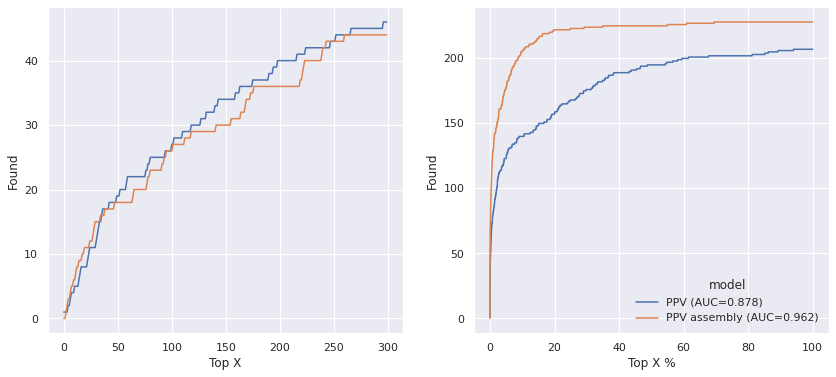

In [40]:
fig = plt.figure(figsize=(2 * 7, 6))
ax1, ax2 = fig.subplots(1, 2, sharey=False)
sns.lineplot(x="Top X", y="Found", hue="model", data=df_plot[df_plot["Top X"] < 300], ax=ax1, legend=False)
g = sns.lineplot(x="Top X %", y="Found", hue="model", data=df_plot, ax=ax2)


## Figure 4a

In [11]:
exclude_features = [
    (    'MS Count',             'start'),
    (    'MS Count',             'stop'),
    (    'MS Frequency',        'protein_coverage'),
    (    'MS Frequency',        'cluster_coverage'),
]
feature_columns = df.columns[ (df.columns.get_level_values(0).str.startswith('MS')) & ~(df.columns.isin(exclude_features))]
    # df['MS Count', 'start'] = np.log10(df['MS Count', 'start'])
models = []
model_names = []
for t in range(5):
    for v in range(5):
        if not t ==v:
            models.append(pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{t}_v{v}.pkl'), 'rb')))
            model_names.append((t,v))


coef = [model.named_steps['logreg'].coef_ for model in models]
coef_df = pd.DataFrame(np.concatenate(coef), columns=feature_columns)

coef_raw = [model.named_steps['logreg'].coef_ / np.sqrt(model.named_steps['scaler'].var_) for model in models]
coef_raw_df = pd.DataFrame(np.concatenate(coef_raw), columns=feature_columns)

coef_df.columns = [' '.join(col).strip() for col in coef_df.columns.values]
coef_raw_df.columns= [' '.join(col).strip() for col in coef_raw_df.columns.values]

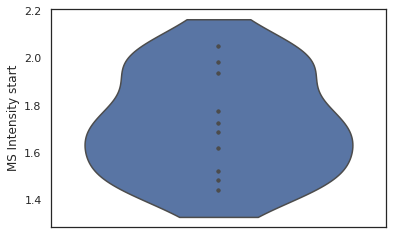

In [12]:
sns.violinplot(y=coef_df['MS Intensity start'], cut=True, inner='point')
plt.savefig(f"figures/paper/figure_4a.svg")
plt.savefig(f"figures/paper/figure_4a.pdf")

## Figure 4b

In [13]:
order = coef_df.mean(axis=0).sort_values().index.tolist()

In [14]:
sns.set_theme(style='white')

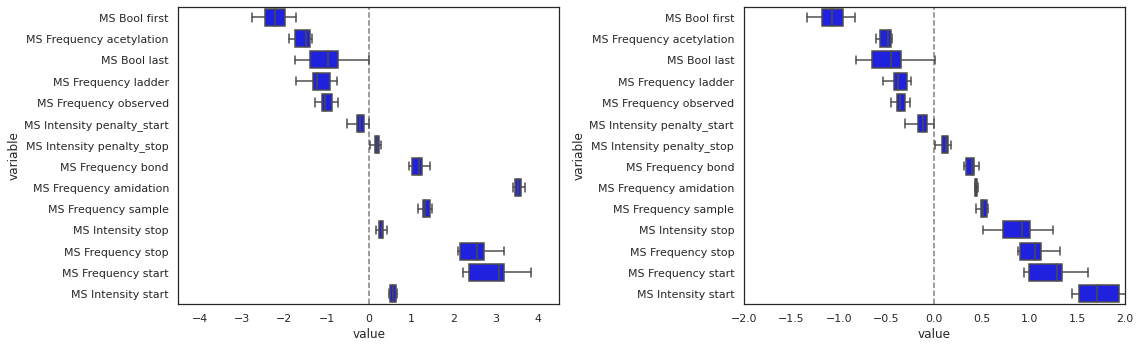

In [15]:
fig, axs = plt.subplots(1,2,figsize=(8*2,5))

axs[0].axvline(0, c='grey', linestyle='--', zorder=0)
axs[1].axvline(0, c='grey', linestyle='--', zorder=0)
sns.boxplot(data=coef_raw_df.melt(), x='value', y='variable',color='blue', ax=axs[0], order = order, whis=5)
#sns.stripplot(data=coef_raw_df.melt(), x='value', y='variable',color='grey', ax=axs[0], order = order)

sns.boxplot(data=coef_df.melt(), x='value', y='variable',color='blue', ax=axs[1], order = order, whis=5)
axs[0].set_xlim(-4.5,4.5)
axs[1].set_xlim(-2,2)

fig.tight_layout()
plt.savefig(f"figures/paper/figure_4b.svg")
plt.savefig(f"figures/paper/figure_4b.pdf")

## Figure 5a

In [16]:
coef_df.index = pd.MultiIndex.from_tuples(model_names)
coef_df.loc[1]

,MS Intensity start,MS Intensity stop,MS Intensity penalty_start,MS Intensity penalty_stop,MS Bool first,MS Bool last,MS Frequency acetylation,MS Frequency amidation,MS Frequency start,MS Frequency stop,MS Frequency observed,MS Frequency bond,MS Frequency sample,MS Frequency ladder
0,2.050982,0.721572,-0.067843,0.102867,-1.222258,-0.273113,-0.439368,0.423690,0.938219,1.065547,-0.309146,0.406167,0.457189,-0.388922
2,1.940097,0.889732,-0.300959,0.041552,-1.330314,-0.346459,-0.456124,0.427842,1.339628,1.155193,-0.407320,0.413407,0.499709,-0.431109
3,1.776185,1.001078,-0.152346,0.147490,-1.082285,-0.464124,-0.479178,0.445762,1.296638,0.897206,-0.370362,0.379462,0.487282,-0.417471
4,1.986604,0.512568,-0.076641,0.144390,-1.176737,0.005824,-0.566037,0.435350,0.999741,0.884469,-0.254134,0.472211,0.440186,-0.539250


In [17]:
import pandas as pd
import pickle
obs_data = pd.read_pickle('mouse_features_paper_sklearn.pickle')
#obs_data.loc['Mouse Scfat', 'Q0VGU4', 285, 309]

In [18]:
obs_data.loc[[('Mouse Scfat', 'Q0VGU4', 285, 309)]]

MS Intensity                          \
                                         start      stop penalty_start   
campaign_id protein_id start stop                                        
Mouse Scfat Q0VGU4     285   309      5.091527  5.091527           0.0   

                                               MS Bool       MS Frequency  \
                                  penalty_stop   first  last  acetylation   
campaign_id protein_id start stop                                           
Mouse Scfat Q0VGU4     285   309           0.0    True  True          0.0   

                                                        ...     Chemical  \
                                  amidation start stop  ... HydrophRatio   
campaign_id protein_id start stop                       ...                
Mouse Scfat Q0VGU4     285   309        1.0   1.0  1.0  ...          0.4   

                                            Annotations                        \
                                  eisenberg       Known Cluster     Intensity   
campaign_id protein_id start stop                                               
Mouse Scfat Q0VGU4     285   309   0.307961       False       1  5.802583e+06   

                                                                         \
                                                    Sequence N Flanking   
campaign_id protein_id start stop                                         
Mouse Scfat Q0VGU4     285   309   LEGSFLGGSEAGERLLQQGLAQVEA       KVRR   

                                                         
                                  C Flanking   LPV Fold  
campaign_id protein_id start stop                        
Mouse Scfat Q0VGU4     285   309        GRRQ  True    2  

[1 rows x 35 columns]

In [ ]:
# P57774_29_64
# P01942_2_29 

        df_X_orig = df.loc[df[('Annotations', 'Fold')] == test, feature_columns]
        df_X = make_features_numerical(df_X_orig)
        X =  df_X.values

In [19]:
obs_data = pd.read_pickle('mouse_features_paper_sklearn.pickle')
example_peptide = obs_data.loc['Mouse Scfat', 'P01942', 2, 29]
fold = example_peptide['Annotations']['Fold']
print(fold)
scores = []
for v in range(5):
    if not fold ==v:
        model = pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{fold}_v{v}.pkl'), 'rb'))
        scores.append(model.named_steps['scaler'].transform(pd.DataFrame(example_peptide).T[feature_columns]).squeeze())
        print(model.predict_proba(example_peptide[feature_columns].values.reshape(1, -1)))

zscores_hb = pd.DataFrame(scores, columns=feature_columns)
zscores_hb.columns = [' '.join(col).strip() for col in zscores_hb.columns.values]


obs_data = pd.read_pickle('mouse_features_paper.pickle')
example_peptide = obs_data.loc['Mouse Scfat', 'P57774', 29, 64]
fold = example_peptide['Annotations']['Fold']
print(fold)
scores = []
for v in range(5):
    if not fold ==v:
        model = pickle.load(open(os.path.join('nested_cv', 'cv_f_logreg', f'model_t{fold}_v{v}.pkl'), 'rb'))
        scores.append(model.named_steps['scaler'].transform(pd.DataFrame(example_peptide).T[feature_columns]).squeeze())
        print(model.predict_proba(example_peptide[feature_columns].values.reshape(1, -1)))

zscores_ne = pd.DataFrame(scores, columns=feature_columns)
zscores_ne.columns = [' '.join(col).strip() for col in zscores_ne.columns.values]

3
[[0.93310994 0.06689006]]
[[0.88940564 0.11059436]]
[[0.92032726 0.07967274]]
[[0.88873129 0.11126871]]


/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. A

3
[[0.86364167 0.13635833]]
[[0.89233076 0.10766924]]
[[0.86743655 0.13256345]]
[[0.88014089 0.11985911]]


/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. A

In [20]:
compare_df = pd.DataFrame([
    zscores_hb.loc[0], 
    coef_df.loc[1,0], 
    zscores_hb.loc[0] * coef_df.loc[1,0],
    zscores_ne.loc[0], 
    coef_df.loc[3,0],
    zscores_ne.loc[0] * coef_df.loc[3,0]
    ], index= ['P01942_2_29', 'T1V0 coeff.' ,'1x2', 'P57774_29_64', 'T3V0 coeff.', '3x4']).T#.style.background_gradient('RdBu')
compare_df.index = feature_columns


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

def background_gradient(s, m, M, cmap='RdBu', low=0, high=0):
    
    norm = colors.TwoSlopeNorm(vmin=m,vmax=M,vcenter=0)
    rng = M - m
    # norm = colors.Normalize(m - (rng * low),
    #                         M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s;color:black' % color for color in c]

compare_df.style.apply(background_gradient,
               cmap='RdBu',
               m=compare_df.min().min(),
               M=compare_df.max().max(),
)
               #low=0,
               #high=0.2)


In [63]:
(compare_df['P01942_2_29'] * compare_df['T1V0 coeff.']).sum()

9.515947675343506

In [64]:
(compare_df['P57774_29_64'] * compare_df['T3V0 coeff.']).sum()

6.947900958011541

In [1]:
obs_data = pd.read_pickle('mouse_features_paper.pickle')
ppv_data = pd.read_pickle('mouse_features_paper_assembly.pickle')
results_dir = 'nested_cv'
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(obs_data, 'cv_f_logreg', results_dir )


NameError: name 'pd' is not defined

<ipython-input-204-c60e58ea1264>:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 5))


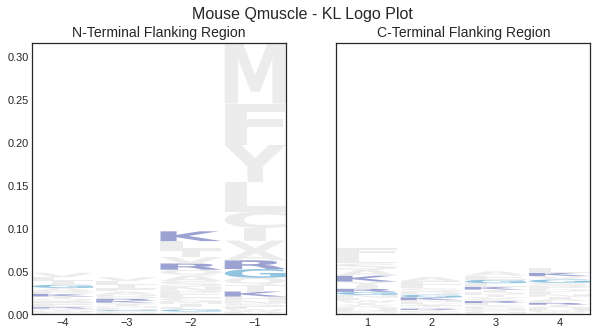

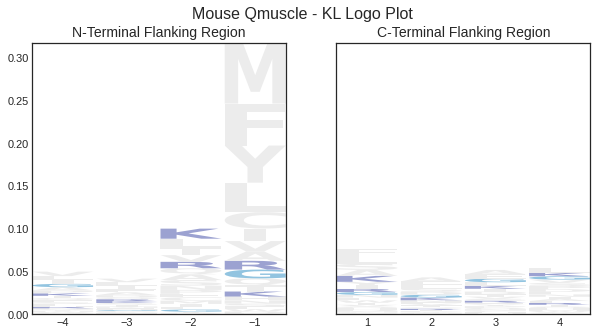

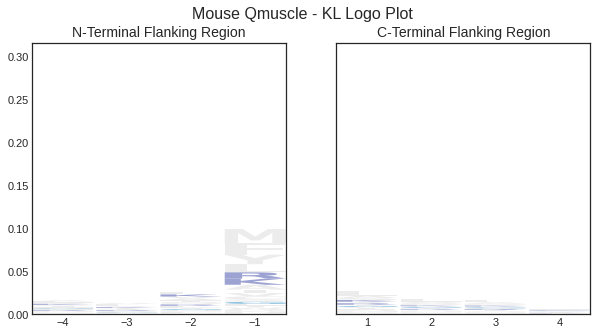

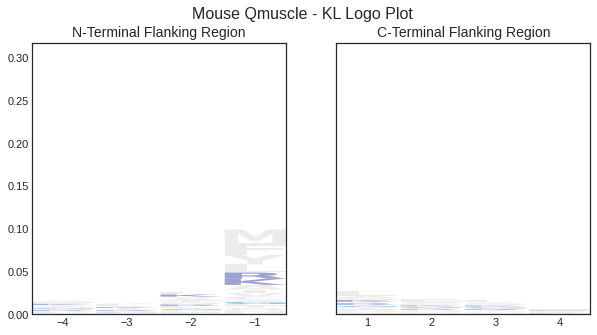

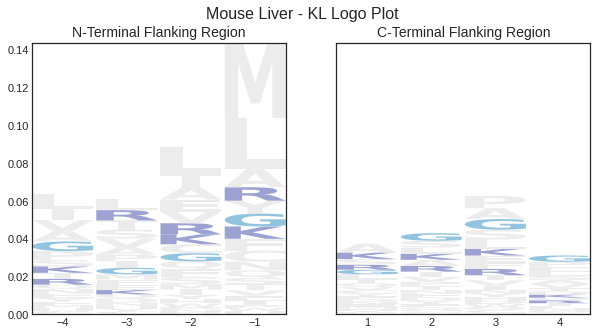

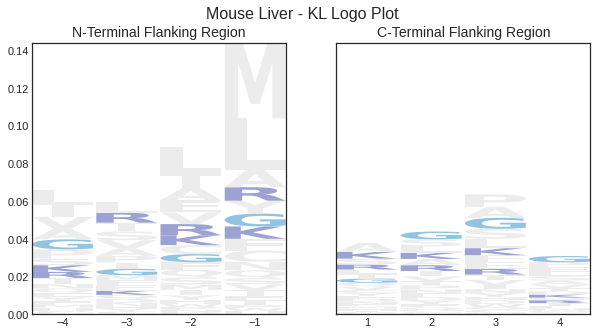

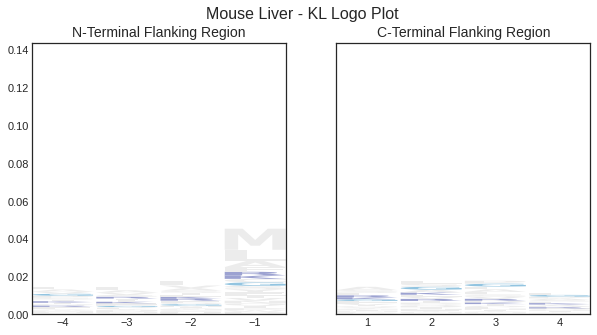

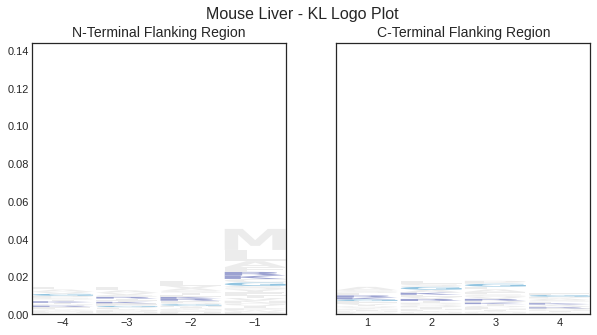

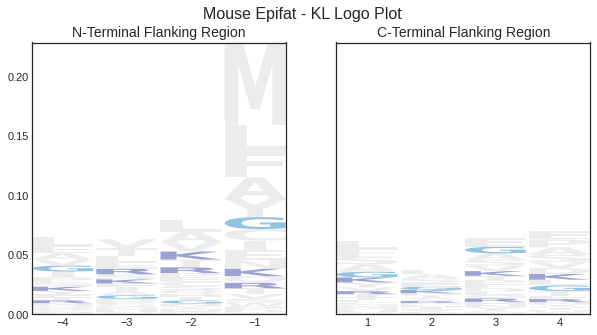

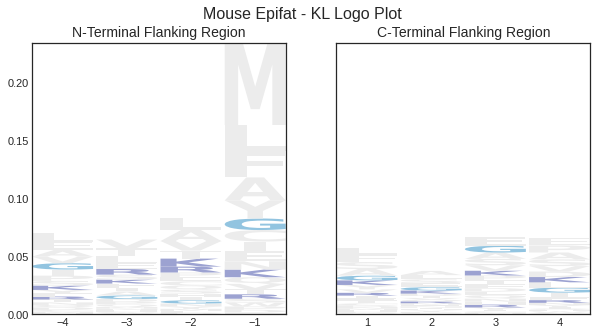

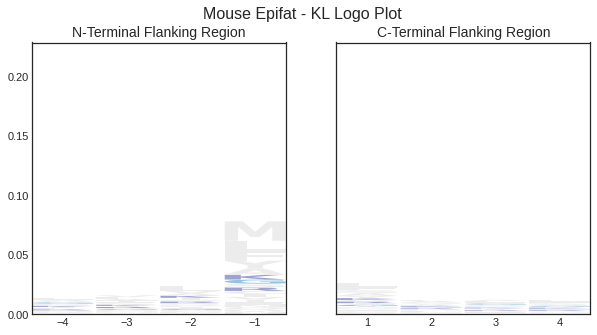

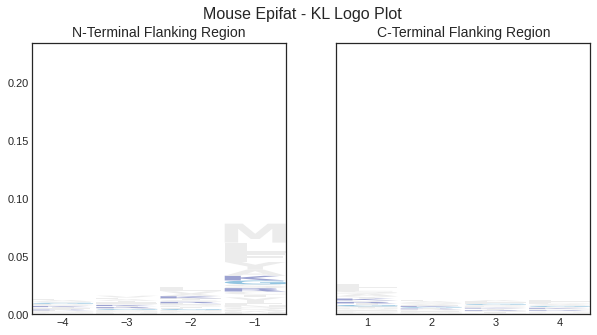

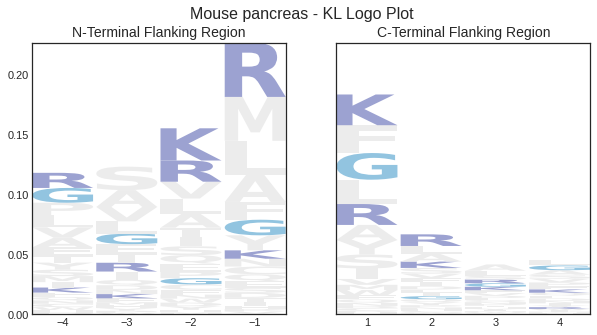

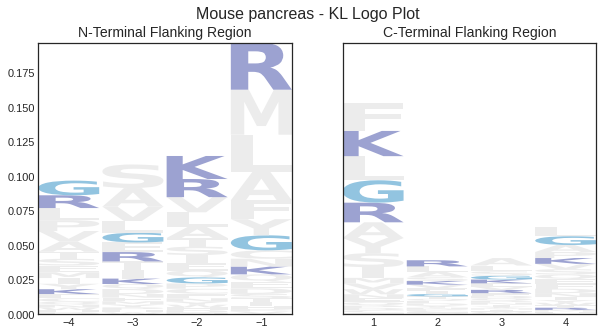

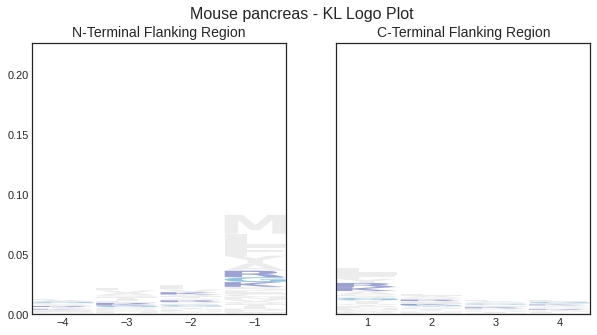

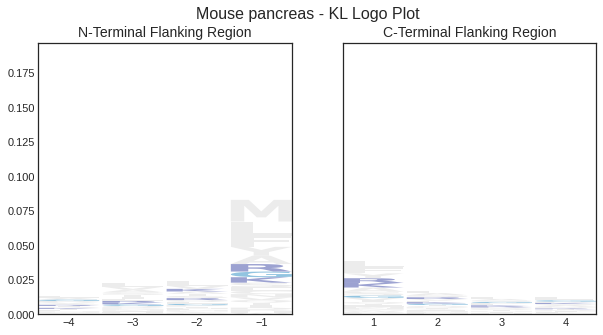

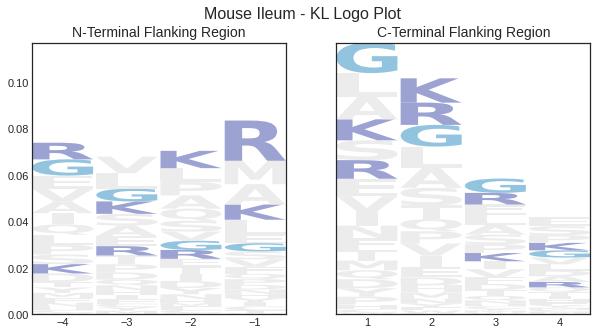

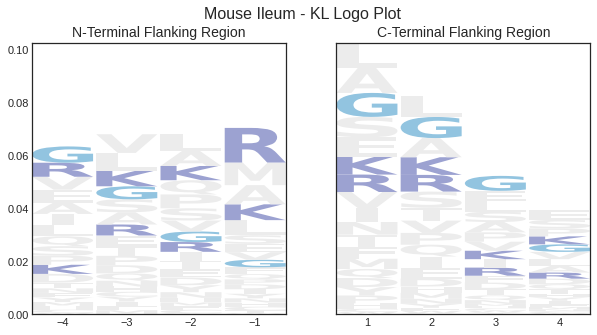

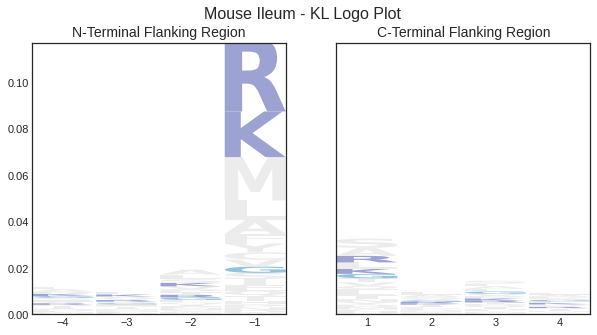

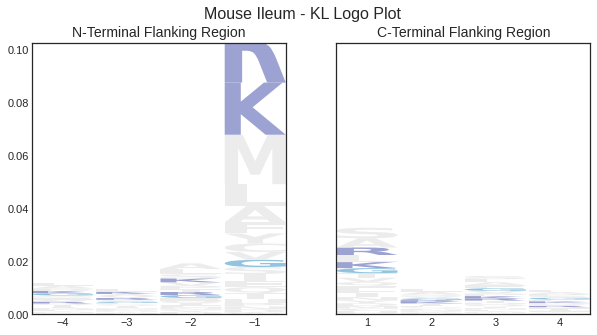

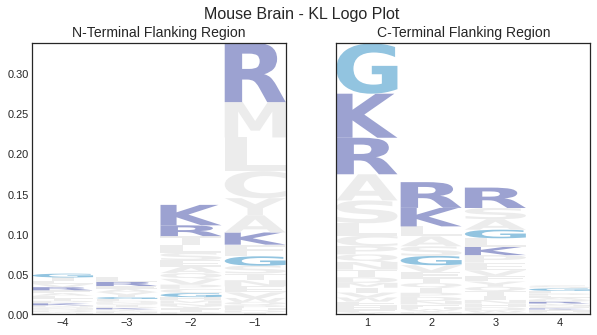

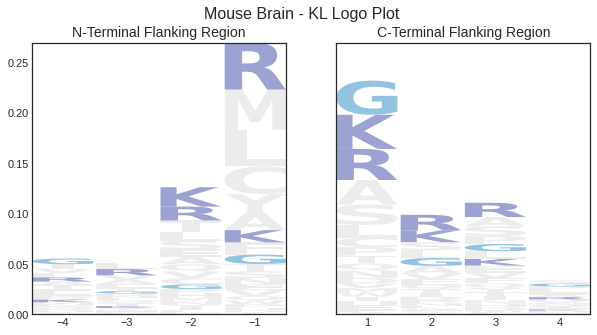

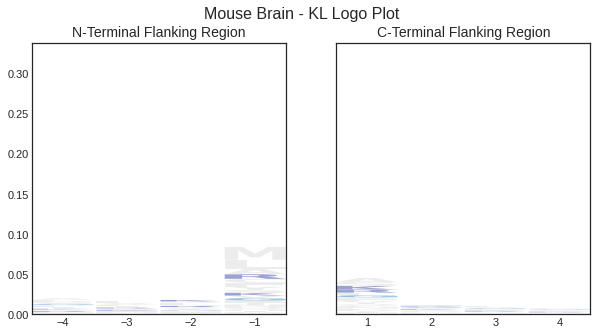

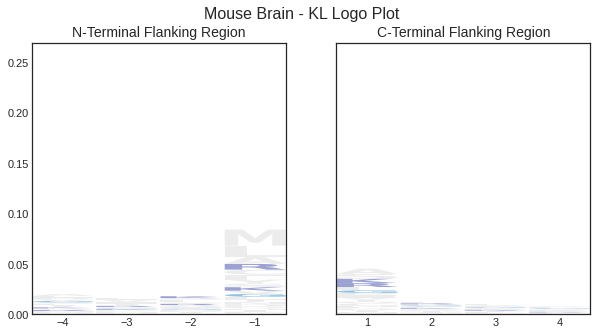

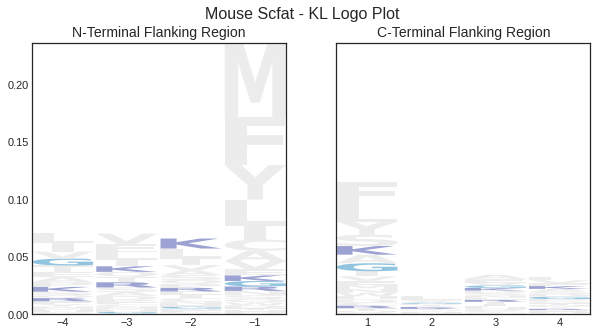

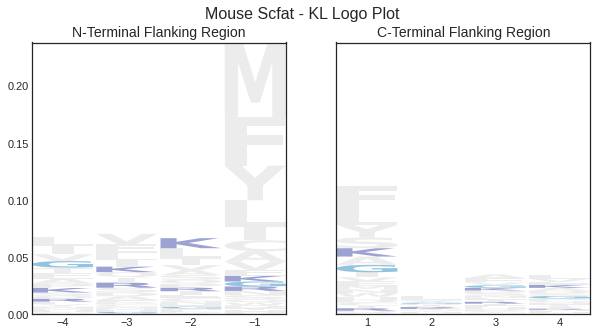

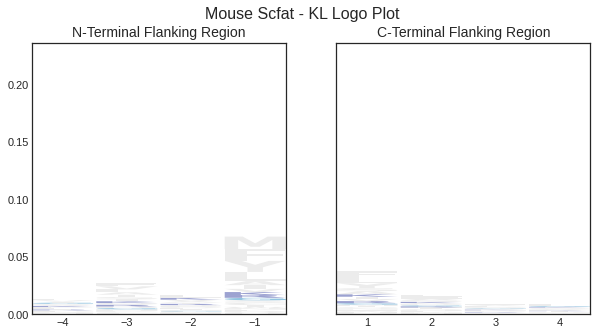

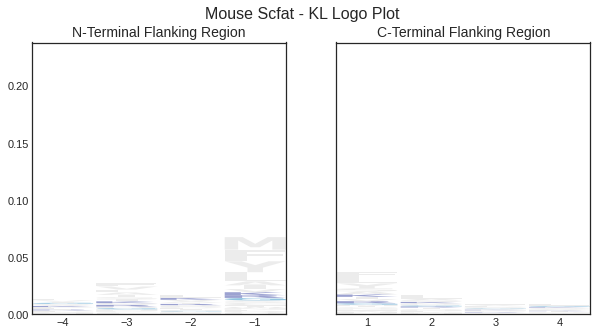

In [204]:
import logomaker

def create_pfm(df, *, by='Counts'):
    annotations = df["Annotations"].copy()
    if by == "Counts":
        annotations[by] = 1
    weights = annotations[by]
    
    aa = list('ACDEFGHIKLMNPQRSTVWY')
    n_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[-4, -3, -2, -1])
    c_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[1, 2, 3, 4])
    _iter = ((n_counts, annotations[by].values, annotations["N Flanking"].values, [-4, -3, -2, -1]),
             (c_counts, annotations[by].values, annotations["C Flanking"].values, [1, 2, 3, 4]))
    for counts, weights, flanking_region, indexer in _iter:
        for w, seq in zip(weights, flanking_region):
            for index, aa in zip(indexer, seq):
                if aa in '_U':
                    continue
                counts.loc[index, aa] += w
    return n_counts, c_counts


def norm(counts, pseudo_count=0.1):
    counts = counts + pseudo_count
    return (counts.T / counts.sum(axis=1)).T


def kl(p, q):
    return (p * np.log2(p / q)).sum(axis=1)


def calc_height(p_count, q_count):
    p = norm(p_count)
    q = norm(q_count)
    I = kl(p, q)
    return (p.T * I).T
    
    
def create_logo_on_axis(height, ax, terminal, max_height, color_scheme=None):
    ax.set_title(f"{terminal}-Terminal Flanking Region", fontsize=14)
    logomaker.Logo(height, font_name='Arial Rounded MT Bold', ax=ax, color_scheme=color_scheme)
    ax.xaxis.grid(False)
    ax.patch.set_visible(False)
    ax.set_ylim(0, max_height)
    
    
def create_logo_plot(n_fg_counts, c_fg_counts, n_bg_counts, c_bg_counts, tissue="Mouse Brain", *, color_scheme=None, max_height=None):
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{tissue} - KL Logo Plot", fontsize=16)
    axes = fig.subplots(1, 2)
    n_height = calc_height(n_fg_counts, n_bg_counts)
    c_height = calc_height(c_fg_counts, c_bg_counts)
    if max_height is None:
        max_height = max(n_height.sum(axis=1).max(), c_height.sum(axis=1).max())
    axes[1].get_yaxis().set_visible(False)
    create_logo_on_axis(n_height, axes[0], "N", max_height, color_scheme)
    create_logo_on_axis(c_height, axes[1], "C", max_height, color_scheme)
    return fig, max_height

def get_aa_counts(fasta_file, amino_acids):
    amino_acids = set(amino_acids)
    counter = {aa: 0 for aa in amino_acids}
    for line in open(fasta_file):
        if line.startswith('>'):
            continue
        for aa in line.strip():
            if aa in amino_acids:
                counter[aa] += 1
    return counter
#     total = sum(counter.values())
#     return {aa: count / total for (aa, count) in counter.items()}



amino_acids = 'ARNDBCEQZGHILKMFPSTWYV'
color_scheme = {aa: '#ececec' for aa in amino_acids}
color_scheme.update({
    "R": "#9ca2d1",
    "K": "#9ca2d1",
    "G": "#92c4e0"
})
df = obs_data.copy()
df["Annotations", "Prediction"] =  obs_data['Predictions', 'cv_f_logreg']

n_total = 500
for tissue in {i[0] for i in obs_data.index}:
    # PPV
    df_tissue = df.loc[tissue].sort_values(("Annotations", "Prediction"), ascending=False)
    known_tissue = df_tissue["Annotations", "Known"].astype(bool)
    heights = []
    for _df in (df_tissue, df_tissue[~known_tissue]):
        # PPV
        top = _df.head(n_total)
        rest = _df.tail(-n_total)
        n_fg, c_fg = create_pfm(top)
        n_bg, c_bg = create_pfm(rest)
        fig, height = create_logo_plot(n_fg, c_fg, n_bg, c_bg, tissue, color_scheme=color_scheme)
        heights.append(height)
        extra = ''
        if _df is not df_tissue:
            extra = "_without_known"
        fig.savefig(f"figures/paper/figure_3h_and_supplement_ppv_{tissue}{extra}.svg")
        fig.savefig(f"figures/paper/figure_3h_and_supplement_ppv_{tissue}{extra}.pdf")
        
    # LPV
    df_tissue = ppv_data.loc[tissue]
    known_tissue = df_tissue["Annotations", "Known"].astype(bool)
    lpv_selector = df_tissue["Annotations", "LPV"]
    obs_selector = df_tissue["MS Bool", "observed"]
    for max_height, _df in zip(heights, (df_tissue, df_tissue[~known_tissue])):
        # PPV
        lpv = df_tissue[lpv_selector]
        not_lpv = df_tissue[~lpv_selector & obs_selector]
        n_lpv, c_lpv = create_pfm(lpv)
        n_not_lpv, c_not_lpv = create_pfm(not_lpv)
        
        fig, _ = create_logo_plot(n_lpv, c_lpv, n_not_lpv, c_not_lpv, tissue, 
                                  color_scheme=color_scheme, max_height=max_height)
        extra = ''
        if _df is not df_tissue:
            extra = "_without_known"
        fig.savefig(f"figures/paper/figure_3h_and_supplement_lpv_{tissue}{extra}.svg")
        fig.savefig(f"figures/paper/figure_3h_and_supplement_lpv_{tissue}{extra}.pdf")


## Figure 5b

In [29]:
uniprot_secreted = pd.read_csv('https://www.uniprot.org/uniprot/?query=locations:(location:%22Secreted%20[SL-0243]%22)&fil=organism%3A%22Mus+musculus+(Mouse)+[10090]%22&format=tab#', sep='\t')
is_secreted = set(uniprot_secreted["Entry"])
def create_secreted(index):
    secreted = pd.Series(False, index=index, dtype=bool)
    for campaign_id, protein_id, start ,stop in index:
    #for campaign_id, pep_id in index.peptidomics.iter_index():
        _index = campaign_id, protein_id, start, stop
        secreted[_index] = protein_id in is_secreted
    return secreted
    
obs_data["Annotations", "Secreted"] = create_secreted(obs_data.index)

uniprot_proteome = pd.read_csv('https://www.uniprot.org/uniprot/?query=*&fil=reviewed%3Ayes+AND+organism%3A%22Mus+musculus+%28Mouse%29+%5B10090%5D%22+AND+proteome%3Aup000000589&format=tab#', sep='\t')
uniprot_proteome_secreted = pd.read_csv('https://www.uniprot.org/uniprot/?query=reviewed%3Ayes+AND+organism%3A%22Mus+musculus+%28Mouse%29+%5B10090%5D%22+AND+proteome%3Aup000000589+AND+locations%3A%28location%3A%22Secreted+%5BSL-0243%5D%22%29&sort=score&format=tab#', sep='\t')

In [47]:
proteome_secreted = len(uniprot_proteome_secreted)/len(uniprot_proteome) *100
peptidome_secreted = obs_data['Annotations', 'Secreted'].sum() / len(obs_data) *100

sub_df = obs_data.loc[obs_data['Predictions', 'cv_f_logreg']>0.01]
high_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100


sub_df = obs_data.nlargest(200, ('Predictions', 'cv_f_logreg'))
top_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100

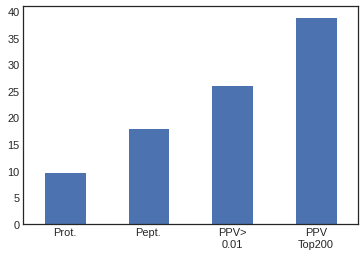

In [55]:
pd.Series({'Prot.': proteome_secreted, 'Pept.': peptidome_secreted, 'PPV>\n0.01': high_secreted, 'PPV\nTop200':top_secreted}).plot(kind='bar', rot=0)

plt.savefig("figures/paper/5b.pdf")
plt.savefig("figures/paper/5b.svg")

## Figure 5c

In [196]:
import matplotlib as mpl
mpl.style.use('default')

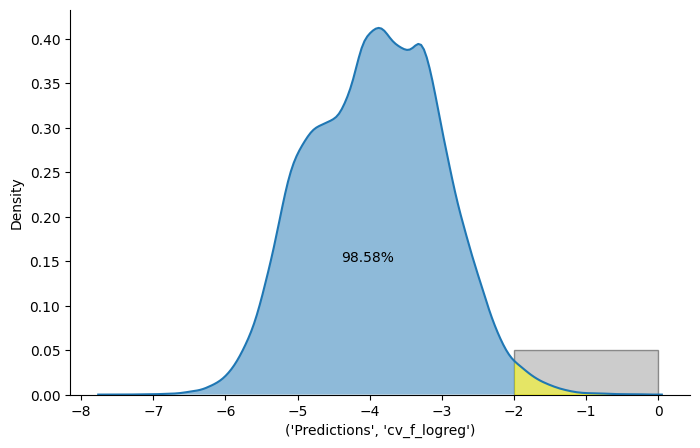

In [190]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
sns.kdeplot(np.log10(obs_data['Predictions', 'cv_f_logreg']), ax=ax)

rec = plt.Rectangle((-2,0),2,0.05, alpha=0.4, facecolor='grey', linewidth=1, edgecolor='black')
ax.add_patch(rec)

below_001 = (obs_data['Predictions', 'cv_f_logreg']<=0.01).sum() /len(obs_data)
ax.text(-4.4, 0.15, f'{below_001:.2%}')
sns.despine()

kde_x = ax.lines[0].get_xdata()
kde_y = ax.lines[0].get_ydata()
plt.fill_between(kde_x[kde_x<=-1.98], kde_y[kde_x<=-1.98], alpha=0.5, label='>0.01')
plt.fill_between(kde_x[kde_x>=-2], kde_y[kde_x>=-2], color='yellow', alpha=0.5, label='>0.01')

plt.savefig("figures/paper/5c.pdf")
plt.savefig("figures/paper/5c.svg")


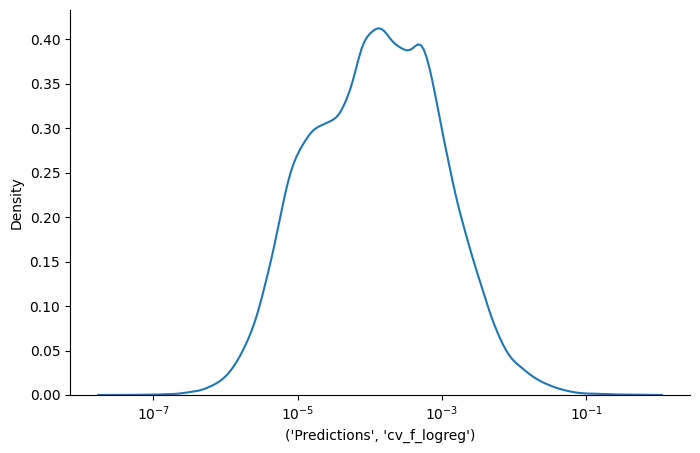

In [191]:
fig = plt.figure(figsize=(8,5))
ax = plt.gca()
sns.kdeplot(obs_data['Predictions', 'cv_f_logreg'], ax=ax, log_scale=True)

rec = plt.Rectangle((-2,0),2,0.05, alpha=0.4, facecolor='grey', linewidth=1, edgecolor='black')
ax.add_patch(rec)

sns.despine()

In [192]:
print(f"Above 0.01: {(obs_data['Predictions', 'cv_f_logreg']>0.01).sum() /len(obs_data) *100}")
print(f"Above 0.05: {(obs_data['Predictions', 'cv_f_logreg']>0.05).sum() /len(obs_data) *100}")

Above 0.01: 1.4231168139805968
Above 0.05: 0.15557452432744995


In [193]:
kde_x = ax.lines[0].get_xdata()
kde_y = ax.lines[0].get_ydata()

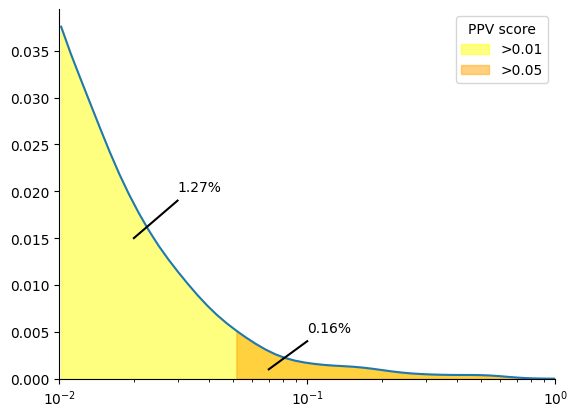

In [195]:
plt.plot(kde_x[kde_x>0.01], kde_y[kde_x>0.01])

thr = 0.05
plt.fill_between(kde_x[kde_x>0.01], kde_y[kde_x>0.01], color='yellow', alpha=0.5, label='>0.01')
plt.fill_between(kde_x[kde_x>thr], kde_y[kde_x>thr], color='orange', alpha=0.5, label='>0.05')
ax = plt.gca()
ax.set_xscale('log')
ax.xaxis.get_ticklocs(minor=True)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
plt.xlim(0.01, 1)
plt.ylim(0,)
sns.despine()
plt.legend(title='PPV score')


perc_001 = f"{((obs_data['Predictions', 'cv_f_logreg']>0.01).sum() - (obs_data['Predictions', 'cv_f_logreg']>0.05).sum()) /len(obs_data):.2%}"
perc_005 = f"{(obs_data['Predictions', 'cv_f_logreg']>0.05).sum() /len(obs_data):.2%}"
ax.text(0.03, 0.02, perc_001)
ax.plot((0.02, 0.03), (0.015, 0.019), 'black', linestyle='-')

ax.text(0.1, 0.005, perc_005)
ax.plot((0.07, 0.1), (0.001, 0.004), 'black', linestyle='-')


plt.savefig("figures/paper/5c_zoom.pdf")
plt.savefig("figures/paper/5c_zoom.svg")

## Figure 7a

In [19]:
results_dir = 'nested_cv'
obs_data = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = obs_data.columns[obs_data.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(obs_data, 'cv_f_logreg', results_dir )

obs_data['Annotations', 'C Inside'] = obs_data['Annotations', 'Sequence'].apply(lambda x: x[-4:])

In [50]:
import pathlib
import logomaker 

def create_pfm(df, *, by='Counts', n_name="N Flanking", c_name="C Flanking"):
    annotations = df["Annotations"].copy()
    if by == "Counts":
        annotations[by] = 1
    weights = annotations[by]
    
    aa = list('ACDEFGHIKLMNPQRSTVWY')
    n_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[-4, -3, -2, -1])
    c_counts = pd.DataFrame(np.zeros((4, len(aa))), columns=aa, index=[1, 2, 3, 4])
    _iter = ((n_counts, annotations[by].values, annotations[n_name].values, [-4, -3, -2, -1]),
             (c_counts, annotations[by].values, annotations[c_name].values, [1, 2, 3, 4]))
    for counts, weights, flanking_region, indexer in _iter:
        for w, seq in zip(weights, flanking_region):
            for index, aa in zip(indexer, seq):
                if aa in '_U':
                    continue
                counts.loc[index, aa] += w
    return n_counts, c_counts


def norm(counts, pseudo_count=0.1):
    counts = counts + pseudo_count
    return (counts.T / counts.sum(axis=1)).T
    
def kl(p, q):
    return (p * np.log2(p / q)).sum(axis=1)


def calc_kl_height(p_count, q_count):
    p = norm(p_count)
    q = norm(q_count)
    I = kl(p, q)
    return (p.T * I).T


def calc_log_ratio_height(fg_count, bg_count):
    return np.log2(norm(fg_count)) - np.log2(norm(bg_count))
    
    
def calc_diff_height(fg_count, bg_count):
    return norm(fg_count) - norm(bg_count)

def create_logo_on_axis(height, ax, title, ylim=None, color_scheme=None):
#     ax.set_title(f"{terminal}-Terminal Flanking Region", fontsize=14)
    ax.set_title(title, fontsize=14)
    logomaker.Logo(height, font_name='Arial Rounded MT Bold', ax=ax, color_scheme=color_scheme, flip_below=False)
    ax.xaxis.grid(False)
    ax.patch.set_visible(False)
    if ylim is not None:
        ax.set_ylim(*ylim)
    
    
def create_logo_plot(n_fg_counts, c_fg_counts, n_bg_counts, c_bg_counts, tissue="Mouse Brain", *,
                     color_scheme=None, ylim=None, n_title="N-Terminal Flanking Region",
                     c_title="C-Terminal Flanking Region", name="KL", calc_height=calc_kl_height):
                     
    fig = plt.figure(figsize=(10, 5))
    fig.suptitle(f"{tissue} - {name} Logo Plot", fontsize=16)
    axes = fig.subplots(1, 2)
    
    n_height = calc_height(n_fg_counts, n_bg_counts)
    c_height = calc_height(c_fg_counts, c_bg_counts)
    
    if ylim is None:
        ymax = max(c_height[(0 < c_height)].sum(axis=1).max(), n_height[(0 < n_height)].sum(axis=1).max())
        ymin = min(c_height[(c_height < 0)].sum(axis=1).min(), n_height[(n_height < 0)].sum(axis=1).min())
        ylim = (ymin, ymax)
        
    axes[1].get_yaxis().set_visible(False)
    create_logo_on_axis(n_height, axes[0], n_title, ylim, color_scheme)
    create_logo_on_axis(c_height, axes[1], c_title, ylim, color_scheme)
    return fig, ylim

def get_aa_counts(fasta_file, amino_acids):
    amino_acids = set(amino_acids)
    counter = {aa: 0 for aa in amino_acids}
    for line in open(fasta_file):
        if line.startswith('>'):
            continue
        for aa in line.strip():
            if aa in amino_acids:
                counter[aa] += 1
    return counter

amino_acids = 'ARNDBCEQZGHILKMFPSTWYV'
color_scheme = {aa: '#ececec' for aa in amino_acids}
color_scheme.update({
    "R": "#9ca2d1",
    "K": "#9ca2d1",
    "G": "#92c4e0"
})

def _create_figs(fg, bg, tissue, ylims=(None, None), *, n_name="N Flanking", c_name="C Flanking",
                color_scheme=color_scheme):
    n_fg, c_fg = create_pfm(fg, n_name=n_name, c_name=c_name)
    n_bg, c_bg = create_pfm(bg, n_name=n_name, c_name=c_name)
    names = ("KL", "Change in Percent")
    height_functions = [calc_kl_height, lambda p, q: 100 * calc_diff_height(p, q)]
    return list(zip(*[create_logo_plot(n_fg, c_fg, n_bg, c_bg, tissue.title(), calc_height=height_function,
                            name=name, color_scheme=color_scheme, ylim=ylim)
            for name, height_function, ylim in zip(names, height_functions, ylims)]))

def _save(figs, name, tissue, extra='', types=('kl', 'diff')):
    for fig, type_ in zip(figs, types):
        for ext in ('svg', 'pdf'):
            folder = pathlib.Path(f"../figures/logo/{type_}/{ext}")
            folder.mkdir(exist_ok=True, parents=True)
            fig.savefig(folder / f"{name}_{tissue.lower()}{extra}.{ext}")


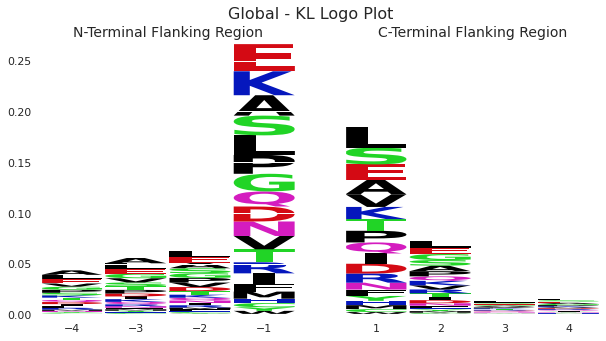

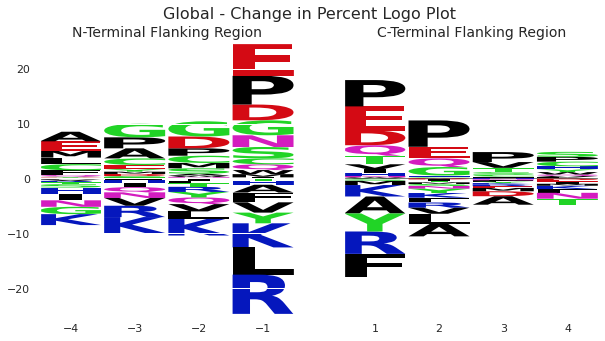

In [51]:
amidation_selector = obs_data["MS Frequency", "amidation"] > 0.75
g_selector = obs_data["Annotations", "C Flanking"].apply(lambda x: x[0] == 'G')
# obs_data.loc[~g_selector & amidation_selector]["Annotations"]


known_selector = obs_data["Annotations", "Known"].astype(bool)
n_total = 100
extra = '_without_known'

df_no_g = obs_data.loc[~g_selector & ~known_selector]
amidation_selector = df_no_g["MS Frequency", "amidation"] > 0.75

# amidated vs not amidated
alt_amidated = df_no_g.loc[amidation_selector]
not_amidated = df_no_g.loc[~amidation_selector]
figs1, _ = _create_figs(alt_amidated, not_amidated, 'global', n_name="C Inside", color_scheme=None)
_save(figs1, 'alt_am_vs_not_am', 'global', extra)

name = 'alt_am_vs_not_am'
for fig, type_ in zip(figs1, ('kl', 'diff')):
    for ext in ('svg', 'pdf'):
        folder = pathlib.Path("figures/paper")
        fig.savefig(folder / f"7a.{ext}")

## Figure 7b

In [52]:
inside = 'EP' # + 'D'
outside = 'PE' # + 'D'

total_am = df_no_g[amidation_selector].shape[0]
total_not_am = df_no_g[~amidation_selector].shape[0]

for _in in inside:
    for _out in outside:
        e_inside_selector = df_no_g["Annotations", "C Inside"].apply(lambda x: x[3] == _in)
        p_outside_selector = df_no_g["Annotations", "C Flanking"].apply(lambda x: x[0] == _out)

        am_io = df_no_g.loc[amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
        am_i = df_no_g.loc[amidation_selector & e_inside_selector].shape[0] / total_am
        am_o = df_no_g.loc[amidation_selector & p_outside_selector].shape[0] / total_am

        not_am_io = df_no_g.loc[~amidation_selector & e_inside_selector & p_outside_selector].shape[0]  / total_not_am
        not_am_i = df_no_g.loc[~amidation_selector & e_inside_selector].shape[0] / total_not_am
        not_am_o = df_no_g.loc[~amidation_selector & p_outside_selector].shape[0]  / total_not_am

        print(f'{_in}|*: am={100 * am_i:4.2f}% bg={100 * not_am_i:4.2f}%, enrichment={am_i / not_am_i:4.2f}')
        print(f'*|{_out}: am={100 * am_o:4.2f}% bg={100 * not_am_o:4.2f}%, enrichment={am_o / not_am_o:4.2f}')
        print(f'{_in}|{_out}: am={100 * am_io:4.2f}% bg={100 * not_am_io:4.2f}%, enrichment={am_io / not_am_io:4.2f}')
        both = am_io / not_am_io
        expected_both = am_i * am_o / (not_am_i * not_am_o)
        print(f'---: expected={expected_both:4.2f} observed={both:4.2f}, extra_enrichment={both / expected_both:4.2f}')
        print()


E|*: am=10.59% bg=4.51%, enrichment=2.35
*|P: am=6.17% bg=1.29%, enrichment=4.77
E|P: am=0.76% bg=0.05%, enrichment=15.21
---: expected=11.20 observed=15.21, extra_enrichment=1.36

E|*: am=10.59% bg=4.51%, enrichment=2.35
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=1.52% bg=0.37%, enrichment=4.10
---: expected=5.49 observed=4.10, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|P: am=6.17% bg=1.29%, enrichment=4.77
P|P: am=0.62% bg=0.04%, enrichment=14.58
---: expected=19.47 observed=14.58, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.83% bg=0.07%, enrichment=11.92
---: expected=9.55 observed=11.92, extra_enrichment=1.25



In [59]:
outstr = '''
E|*: am=10.59% bg=4.51%, enrichment=2.35
*|P: am=6.17% bg=1.29%, enrichment=4.77
E|P: am=0.76% bg=0.05%, enrichment=15.21
---: expected=11.20 observed=15.21, extra_enrichment=1.36

E|*: am=10.59% bg=4.51%, enrichment=2.35
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=1.52% bg=0.37%, enrichment=4.10
---: expected=5.49 observed=4.10, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|P: am=6.17% bg=1.29%, enrichment=4.77
P|P: am=0.62% bg=0.04%, enrichment=14.58
---: expected=19.47 observed=14.58, extra_enrichment=0.75

P|*: am=6.93% bg=1.70%, enrichment=4.08
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.83% bg=0.07%, enrichment=11.92
---: expected=9.55 observed=11.92, extra_enrichment=1.25
'''

with open('figures/paper/7b.txt', 'w') as f:
    f.write('Global')
    f.write(outstr)

In [54]:
# inside = 'EP' # + 'D'
# outside = 'PE' # + 'D'
inside = 'EP' # + 'D'
outside = 'EP' # + 'D'

# total_am = df_no_g[amidation_selector].shape[0]
high_scoring = 0.01 < df_no_g["Predictions", "cv_f_logreg"] 
total_am = df_no_g[amidation_selector & high_scoring].shape[0]

total_not_am = df_no_g[~amidation_selector].shape[0]

for _in in inside:
    for _out in outside:
        e_inside_selector = df_no_g["Annotations", "C Inside"].apply(lambda x: x[3] == _in)
        p_outside_selector = df_no_g["Annotations", "C Flanking"].apply(lambda x: x[0] == _out)

#         am_io = df_no_g.loc[amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
#         am_i = df_no_g.loc[amidation_selector & e_inside_selector].shape[0] / total_am
#         am_o = df_no_g.loc[amidation_selector & p_outside_selector].shape[0] / total_am
        am_io = df_no_g.loc[high_scoring & amidation_selector & e_inside_selector & p_outside_selector].shape[0] / total_am
        am_i = df_no_g.loc[high_scoring & amidation_selector & e_inside_selector].shape[0] / total_am
        am_o = df_no_g.loc[high_scoring & amidation_selector & p_outside_selector].shape[0] / total_am

        not_am_io = df_no_g.loc[~amidation_selector & e_inside_selector & p_outside_selector].shape[0]  / total_not_am
        not_am_i = df_no_g.loc[~amidation_selector & e_inside_selector].shape[0] / total_not_am
        not_am_o = df_no_g.loc[~amidation_selector & p_outside_selector].shape[0]  / total_not_am

        print(f'{_in}|*: am={100 * am_i:4.2f}% bg={100 * not_am_i:4.2f}%, enrichment={am_i / not_am_i:4.2f}')
        print(f'*|{_out}: am={100 * am_o:4.2f}% bg={100 * not_am_o:4.2f}%, enrichment={am_o / not_am_o:4.2f}')
        print(f'{_in}|{_out}: am={100 * am_io:4.2f}% bg={100 * not_am_io:4.2f}%, enrichment={am_io / not_am_io:4.2f}')
        both = am_io / not_am_io
        expected_both = am_i * am_o / (not_am_i * not_am_o)
        print(f'---: expected={expected_both:4.2f} observed={both:4.2f}, extra_enrichment={both / expected_both:4.2f}')
        print()



E|*: am=12.22% bg=4.51%, enrichment=2.71
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=0.80% bg=0.37%, enrichment=2.16
---: expected=6.34 observed=2.16, extra_enrichment=0.34

E|*: am=12.22% bg=4.51%, enrichment=2.71
*|P: am=3.70% bg=1.29%, enrichment=2.86
E|P: am=0.32% bg=0.05%, enrichment=6.42
---: expected=7.75 observed=6.42, extra_enrichment=0.83

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.32% bg=0.07%, enrichment=4.59
---: expected=8.87 observed=4.59, extra_enrichment=0.52

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|P: am=3.70% bg=1.29%, enrichment=2.86
P|P: am=0.16% bg=0.04%, enrichment=3.80
---: expected=10.84 observed=3.80, extra_enrichment=0.35



In [60]:
outstr = '''
E|*: am=12.22% bg=4.51%, enrichment=2.71
*|E: am=8.20% bg=3.50%, enrichment=2.34
E|E: am=0.80% bg=0.37%, enrichment=2.16
---: expected=6.34 observed=2.16, extra_enrichment=0.34

E|*: am=12.22% bg=4.51%, enrichment=2.71
*|P: am=3.70% bg=1.29%, enrichment=2.86
E|P: am=0.32% bg=0.05%, enrichment=6.42
---: expected=7.75 observed=6.42, extra_enrichment=0.83

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|E: am=8.20% bg=3.50%, enrichment=2.34
P|E: am=0.32% bg=0.07%, enrichment=4.59
---: expected=8.87 observed=4.59, extra_enrichment=0.52

P|*: am=6.43% bg=1.70%, enrichment=3.79
*|P: am=3.70% bg=1.29%, enrichment=2.86
P|P: am=0.16% bg=0.04%, enrichment=3.80
---: expected=10.84 observed=3.80, extra_enrichment=0.35
'''


with open('figures/paper/7b.txt', 'a') as f:
    f.write('Top')
    f.write(outstr)

## Figure PPV vs. PeptideRanker

In [40]:
results_dir = 'nested_cv'
df = pd.read_pickle('mouse_features_paper_with_peptideranker.pickle')
feature_columns = df.columns[df.columns.get_level_values(0).str.startswith('MS')]
add_test_probabilities(df, 'cv_f_logreg', results_dir )

SpearmanrResult(correlation=0.189594749633112, pvalue=0.0062165203606037766)

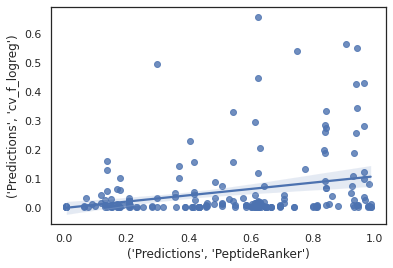

In [41]:
from scipy.stats import spearmanr

data = df.loc[df['Annotations', 'Known']]
x = data[('Predictions', 'PeptideRanker')]
y = data[('Predictions', 'cv_f_logreg')]
sns.regplot(x=x, y =y)
spearmanr(x,y)


In [42]:
# data = df
# x = np.log(data[('Predictions', 'PeptideRanker')])
# y = np.log(data[('Predictions', 'cv_f_logreg')])
# hue = data[('Annotations', 'Known')]
# sns.scatterplot(x=x, y =y, hue=hue, legend=None, alpha=0.5)
# spearmanr(x,y)

In [61]:
## NOTE we technically only make this later in the notebook (or in a script)
obs_data = pd.read_pickle('obs_data_export_tempsave.pkl')
obs_data

MS Intensity                          \
                                         start      stop penalty_start   
campaign_id protein_id start stop                                        
Mouse Brain A2A5R2     547   555      3.810477  3.810477      0.000000   
            A0A0N4SVF0 2     50       5.678206  5.678206      0.000000   
            A0A0J9YUE9 810   823      6.081305  6.081305      0.000000   
                       827   835      5.090792  5.090792      0.000000   
            A0A140LJ69 1391  1410     5.417526  5.417526      0.000000   
...                                        ...       ...           ...   
Mouse Scfat P07724     594   606      0.013547  0.105622      0.001883   
                             608      0.013547  8.779323      0.001883   
                       595   602      0.000012  0.250299      0.001871   
                             603      0.000012  0.459729      0.001871   
                       599   608      0.001871  8.779323      0.000000   

                                               MS Bool        MS Frequency  \
                                  penalty_stop   first   last  acetylation   
campaign_id protein_id start stop                                            
Mouse Brain A2A5R2     547   555      0.000000    True   True          0.0   
            A0A0N4SVF0 2     50       0.000000    True   True          1.0   
            A0A0J9YUE9 810   823      0.000000    True   True          0.0   
                       827   835      0.000000    True   True          0.0   
            A0A140LJ69 1391  1410     0.000000    True   True          0.0   
...                                        ...     ...    ...          ...   
Mouse Scfat P07724     594   606      0.721343   False  False          0.0   
                             608      0.829155   False   True          0.0   
                       595   602      0.010369   False  False          0.0   
                             603      0.260668   False  False          0.0   
                       599   608      0.829155   False   True          0.0   

                                                                 ...  \
                                  amidation     start      stop  ...   
campaign_id protein_id start stop                                ...   
Mouse Brain A2A5R2     547   555   1.000000  1.000000  1.000000  ...   
            A0A0N4SVF0 2     50    1.000000  1.000000  1.000000  ...   
            A0A0J9YUE9 810   823   0.000000  1.000000  1.000000  ...   
                       827   835   0.000000  1.000000  1.000000  ...   
            A0A140LJ69 1391  1410  0.000000  1.000000  1.000000  ...   
...                                     ...       ...       ...  ...   
Mouse Scfat P07724     594   606   0.000000  0.030713  0.215888  ...   
                             608   0.000000  0.030713  1.000000  ...   
                       595   602   0.000002  0.000028  0.438045  ...   
                             603   0.000002  0.000028  0.653047  ...   
                       599   608   0.000000  0.004298  1.000000  ...   

                                    Predictions             Annotations       \
                                  PeptideRanker cv_f_logreg    Secreted Type   
campaign_id protein_id start stop                                              
Mouse Brain A2A5R2     547   555       0.125712    0.004915       False  NaN   
            A0A0N4SVF0 2     50        0.053746    0.002986       False  NaN   
            A0A0J9YUE9 810   823       0.521992    0.001207       False  NaN   
                       827   835       0.731581    0.000443       False  NaN   
            A0A140LJ69 1391  1410      0.408675    0.000566       False  NaN   
...                                         ...         ...         ...  ...   
Mouse Scfat P07724     594   606       0.187002    0.000010        True  NaN   
                             608       0.290166    0.000599        True  NaN   
               

The plot above appears to be showing PPV score versus PeptideRanker. But, how is the subset selected? I guess it only makes sense to do such a plot for peptides which appear with a reasonable level of signal in our MS data? No doubt, there are known peptides that are completely absent from our MS data set (we simply do not observe them) but scored high by PeptideRanker. Those, however, are less interesting for this paper. I would be more interesting in seeing a dot-plot of the 200 highest scoring (by PPV score) peptides (e.g. from mouse brain) with PPV score on the x-axis and Peptide Ranker score on the Y-axis. Plus, color coding (for instance red points) for alle known peptides. @FEGT (Felix Georg Teufel): could you make the plot I suggest here?

SpearmanrResult(correlation=0.14495015526012142, pvalue=0.011956792661994474)

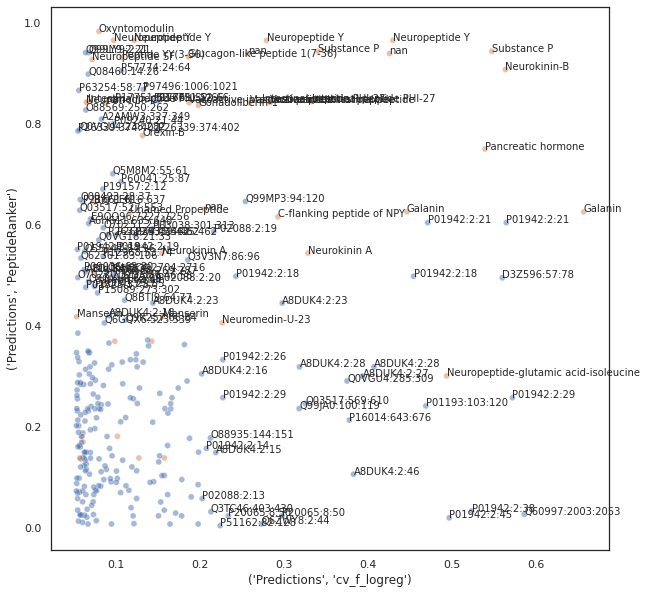

In [64]:
plt.figure(figsize=(10,10))

data = df.nlargest(300,('Predictions', 'cv_f_logreg'))
y = data[('Predictions', 'PeptideRanker')]
x = data[('Predictions', 'cv_f_logreg')]
hue = data[('Annotations', 'Known')]
sns.scatterplot(x=x, y =y, hue=hue, alpha=0.5, legend=None)

for idx, row in data.iterrows():
    name = ':'.join([str(x) for x in row.name[1:]])
    if row['Annotations', 'Known']:
        name =  obs_data.loc[row.name]['Annotations', 'Full Name']

    if row[('Predictions', 'cv_f_logreg')]> 0.2:
        plt.text(row[('Predictions', 'cv_f_logreg')], row[('Predictions', 'PeptideRanker')], name, size='small')
    elif row[('Predictions', 'PeptideRanker')] > 0.4:
        plt.text(row[('Predictions', 'cv_f_logreg')], row[('Predictions', 'PeptideRanker')], name, size='small')

plt.savefig("figures/supplement/ppv_vs_peptideranker.png")
plt.savefig("figures/supplement/ppv_vs_peptideranker.svg")

spearmanr(x,y)

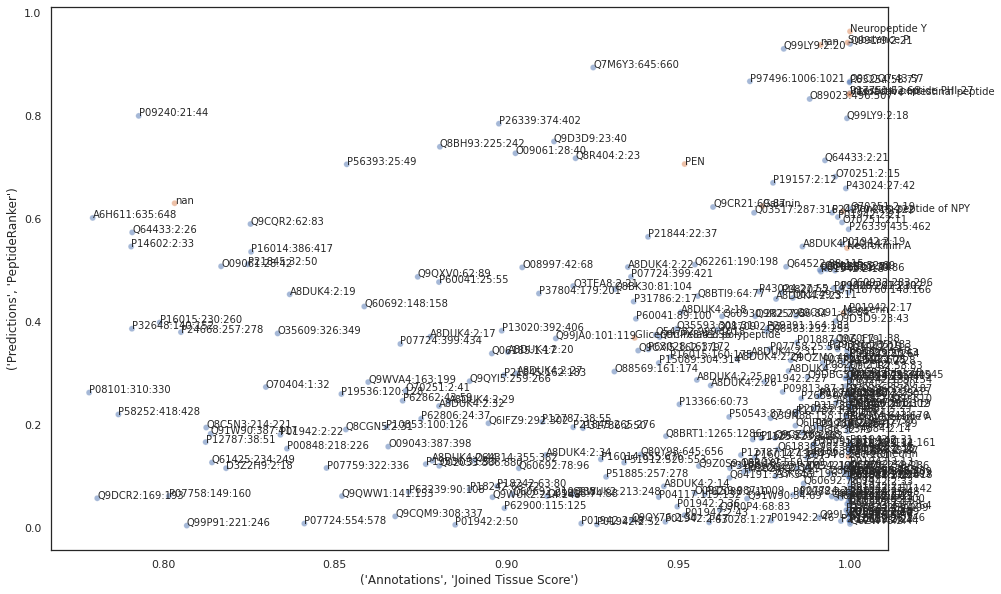

In [74]:
tissue_indexes = [slice(None)] + list(obs_data.index.levels[0])
df_out = obs_data.sort_values(by=[("Annotations", "Joined Tissue Score"), ("Predictions", "cv_f_logreg")])[::-1].droplevel(0)
# df_out = df_out.loc[~out_df.index.duplicated()]
df_out = df_out.loc[~df_out.index.duplicated()]
tissue_name = "All Tissues Combined"
tissue_index = slice(None)
        # 8_50

df_tissue = df_out.loc[tissue_index]
df_tissue["Annotations", "Joined Tissue Score"] = df_tissue["Annotations", "Joined Tissue Score"].astype(float)


plt.figure(figsize=(15,10))

data = df_tissue.nlargest(300,('Annotations', 'Joined Tissue Score'))
y = data[('Predictions', 'PeptideRanker')]
x = data[('Annotations', 'Joined Tissue Score')]
hue = data[('Annotations', 'Known')]
sns.scatterplot(x=x, y =y, hue=hue, alpha=0.5, legend=None)

for idx, row in data.iterrows():
    name = ':'.join([str(x) for x in row.name])
    if row['Annotations', 'Known']:
        name =  row['Annotations', 'Full Name']

    if row[('Annotations', 'Joined Tissue Score')]> 0.2:
        plt.text(row[('Annotations', 'Joined Tissue Score')], row[('Predictions', 'PeptideRanker')], name, size='small')
    elif row[('Predictions', 'PeptideRanker')] > 0.4:
        plt.text(row[('Annotations', 'Joined Tissue Score')], row[('Predictions', 'PeptideRanker')], name, size='small')

In [67]:
df_tissue

MS Intensity                                        \
                             start       stop penalty_start penalty_stop   
protein_id start stop                                                      
P20065     8     50       4.140642  10.188907      0.098556     0.363980   
Q6ZWY8     2     44      10.055668   9.975542      0.073453     0.153580   
P01942     2     29       5.198481   0.005430      0.066772     0.139516   
                 34       3.916050   0.378564      0.025594     0.788633   
P57774     29    64       7.988795   8.006663      0.020578     0.002710   
...                            ...        ...           ...          ...   
P07724     565   571      0.002372   0.290793      0.074862     0.211625   
P31786     8     22       0.002823   0.153133      0.025973     0.567631   
P43274     81    88       4.039648   0.000323      3.067652     0.000000   
P18242     208   216      0.219023   0.007914      0.779064     0.043074   
P07724     50    57       0.002336   0.117419      0.362170     0.737612   

                      MS Bool        MS Frequency                          \
                        first   last  acetylation     amidation     start   
protein_id start stop                                                       
P20065     8     50     False   True     0.995087  3.271734e-01  0.999928   
Q6ZWY8     2     44      True   True     0.999580  1.697125e-04  1.000000   
P01942     2     29     False  False     0.000194  9.029616e-01  0.999994   
                 34     False  False     0.000856  8.990241e-02  0.999879   
P57774     29    64      True   True     0.000000  1.000000e+00  1.000000   
...                       ...    ...          ...           ...       ...   
P07724     565   571    False  False     0.000000  0.000000e+00  0.005446   
P31786     8     22     False  False     0.000000  7.936966e-07  0.006479   
P43274     81    88      True  False     0.000000  0.000000e+00  1.000000   
P18242     208   216    False  False     0.000000  4.692775e-04  0.396083   
P07724     50    57     False  False     0.000000  2.789252e-01  0.005365   

                                 ...   Predictions             Annotations  \
                           stop  ... PeptideRanker cv_f_logreg    Secreted   
protein_id start stop            ...                                         
P20065     8     50    1.000000  ...      0.023692    0.298254       False   
Q6ZWY8     2     44    1.000000  ...      0.007610    0.273624       False   
P01942     2     29    0.012425  ...      0.257334    0.572448       False   
                 34    0.581750  ...      0.065708    0.162079       False   
P57774     29    64    1.000000  ...      0.964091    0.430138        True   
...                         ...  ...           ...         ...         ...   
P07724     565   571   0.488074  ...      0.073058    0.000032        True   
P31786     8     22    0.297143  ...      0.109025    0.000011       False   
P43274     81    88    0.000744  ...      0.150285    0.000005       False   
P18242     208   216   0.018057  ...      0.355952    0.000005        True   
P07724     50    57    0.236900  ...      0.474457    0.000023        True   

                                                                      \
                          Type       Full Name Short Names Gene Name   
protein_id start stop                                                  
P20065     8     50        NaN             NaN         NaN    Tmsb4x   
Q6ZWY8     2     44        NaN             NaN         NaN    Tmsb10   
P01942     2     29        NaN             NaN         NaN       Hba   
                 34        NaN             NaN         NaN       Hba   
P57774     29    64    peptide  Neuropeptide Y         NaN       Npy   
...                        ...             ...         ...       ...   
P07724     565   571       NaN             NaN         NaN       Alb   
P31786     8     22        NaN             NaN         NaN       

In [45]:
g.figure.savefig("figures/supplement/ppv_vs_peptideranker.png")
g.figure.savefig("figures/supplement/ppv_vs_peptideranker.svg")

MS Intensity  start                                     3.91605
              stop                                     0.120812
              penalty_start                            0.021296
              penalty_stop                             0.300813
MS Bool       first                                       False
              last                                        False
MS Frequency  acetylation                              0.000856
              amidation                                0.002163
              start                                    0.999879
              stop                                     0.242839
              observed                                 0.000283
              bond                                     0.625687
              sample                                        1.0
              ladder                                   0.052783
              protein_coverage                              1.0
              cluster_coverage          

## Dump predictions

In [21]:
results_dir = 'nested_cv'
df = pd.read_pickle('mouse_features_paper_sklearn.pickle')
exclude_features = [
    (    'MS Count',             'start'),
    (    'MS Count',             'stop'),
    (    'MS Frequency',        'protein_coverage'),
    (    'MS Frequency',        'cluster_coverage'),
]
feature_columns = df.columns[ (df.columns.get_level_values(0).str.startswith('MS')) & ~(df.columns.isin(exclude_features))]
add_test_probabilities(df, 'cv_f_logreg', results_dir )
obs_data = df

df = pd.read_pickle('mouse_features_paper_assembly_with_peptideranker.pickle')
results_dir = 'nested_cv_assembly'
add_test_probabilities(df, 'cv_f_logreg', results_dir )
ppv_data = df

In [22]:
uniprot_secreted = pd.read_csv('https://www.uniprot.org/uniprot/?query=locations:(location:%22Secreted%20[SL-0243]%22)&fil=organism%3A%22Mus+musculus+(Mouse)+[10090]%22&format=tab#', sep='\t')
is_secreted = set(uniprot_secreted["Entry"])
def create_secreted(index):
    secreted = pd.Series(False, index=index, dtype=bool)
    for campaign_id, protein_id, start ,stop in index:
    #for campaign_id, pep_id in index.peptidomics.iter_index():
        _index = campaign_id, protein_id, start, stop
        secreted[_index] = protein_id in is_secreted
    return secreted
    
obs_data["Annotations", "Secreted"] = create_secreted(obs_data.index)
ppv_data["Annotations", "Secreted"] = create_secreted(obs_data.index)

In [23]:
def create_known(file_name):
    rename_columns = {'begin': 'start', 'end': 'stop', 'seq': "Sequence", "full_name": "Full Name", "short_names": "Short Names",
                      'type': "Type"}
    known = pd.read_csv(file_name, sep='\t')
    known = known.loc[(known["type"] == 'peptide') | (known["type"] == 'propeptide')].copy()
    known.rename(columns = rename_columns, inplace = True)
    known.set_index(['protein_id', 'start', 'stop'], inplace=True)
    return known[["Type", "Full Name", "Short Names"]]
    
known_2017 = create_known("../datasets/test_data_10090_known.tsv")
known_2020 = create_known(
#     "/opt/projects/4478_NN/00009_NHP_Peptidomics/jcr/peptidomics-scripts/results/annotations/uniprot/10090_known.tsv")
    "../datasets/2020_04_10090_known.tsv")

In [24]:
obs_annotations = obs_data["Annotations"]
ppv_annotations = ppv_data["Annotations"]

obs_annotations = obs_annotations.join(known_2017[["Type", "Full Name", "Short Names"]],
                           on=['protein_id', 'start', 'stop'])

#obs_annotations.join(known_2017["Type"], on=['protein_id', 'start', 'stop'])

for peptide_anno in ["Type", "Full Name", "Short Names"]:
    if peptide_anno in obs_annotations:
        del obs_annotations[peptide_anno]
    obs_data["Annotations", peptide_anno] = obs_annotations.join(known_2017[peptide_anno], on=['protein_id', 'start', 'stop'])[peptide_anno]
    ppv_data["Annotations", peptide_anno] = ppv_annotations.join(known_2017[peptide_anno], on=['protein_id', 'start', 'stop'])[peptide_anno]


propeptide_selector = obs_data["Annotations", "Type"] == 'propeptide'
unnamed_selector = obs_data["Annotations", "Full Name"].isna()
obs_data.loc[propeptide_selector & unnamed_selector, ("Annotations", "Full Name")] = "Unamed Propeptide"

propeptide_selector = ppv_data["Annotations", "Type"] == 'propeptide'
unnamed_selector = ppv_data["Annotations", "Full Name"].isna()
ppv_data.loc[propeptide_selector & unnamed_selector, ("Annotations", "Full Name")] = "Unamed Propeptide"

In [25]:
# add names
proteome_annotation = pd.read_csv(
    "../datasets/10090_uniprot.protein.tsv",
    sep='\t')
proteome_annotation.set_index("Protein ID", inplace=True)
name_serie = proteome_annotation[proteome_annotation["Name"] == "Full Name"]["Value"]
gene_serie = proteome_annotation[proteome_annotation["Name"] == "Gene Name"]["Value"]

name_dict = dict(zip(list(name_serie.index), name_serie.values))
gene_dict = dict(zip(list(gene_serie.index), gene_serie.values))

extra_names = {}
extra_genes = {}
for protein_id, other_ids in proteome_annotation[proteome_annotation["Name"] == "Other IDs"]["Value"].iteritems():
    for other_id in eval(other_ids):
        if protein_id in name_dict:
            extra_names[other_id] = name_dict[protein_id]
        if protein_id in gene_dict:
            extra_genes[other_id] = gene_dict[protein_id]
name_dict.update(extra_names)
gene_dict.update(extra_genes)

name_serie = pd.Series(name_dict, name='Protein Name')
gene_serie = pd.Series(gene_dict, name='Gene Name')

In [26]:
obs_data["Annotations", "Gene Name"] = obs_annotations.join(gene_serie, on='protein_id')["Gene Name"]
obs_data["Annotations", "Protein Name"] = obs_annotations.join(name_serie, on='protein_id')["Protein Name"]
ppv_data["Annotations", "Gene Name"] = ppv_annotations.join(gene_serie, on='protein_id')["Gene Name"]
ppv_data["Annotations", "Protein Name"] = ppv_annotations.join(name_serie, on='protein_id')["Protein Name"]


In [27]:
obs_known = obs_data["Annotations"].loc[obs_data["Annotations", "Known"]].copy()
obs_known_uniq = obs_known.reset_index().set_index(['protein_id', 'start', 'stop'])
obs_known_uniq = obs_known_uniq.filter(items=["Type", "Full Name", "Short Names"])

obs_known = obs_data["Annotations"].loc[obs_data["Annotations", "Known"]].copy()
obs_known_uniq = obs_known.reset_index().set_index(['protein_id', 'start', 'stop'])
obs_known_uniq = obs_known_uniq.filter(items=["Type", "Full Name", "Short Names"]).reset_index().drop_duplicates()

ppv_known = ppv_data["Annotations"].loc[ppv_data["Annotations", "Known"]].copy()
ppv_known_uniq = ppv_known.reset_index().set_index(['protein_id', 'start', 'stop'])
ppv_known_uniq = ppv_known_uniq.filter(items=["Type", "Full Name", "Short Names"]).reset_index().drop_duplicates()

build_known = ppv_data["Annotations"].loc[ppv_data["Annotations", "Known"].astype(bool) & (ppv_data["MS Bool", "observed"] == False)].copy()
build_known_uniq = build_known.reset_index().set_index(['protein_id', 'start', 'stop'])
build_known_uniq = build_known_uniq.filter(items=["Type", "Full Name", "Short Names"]).reset_index().drop_duplicates()

with pd.ExcelWriter('figures/supplement/peptidomics_known3.xlsx') as writer:  
    obs_known.to_excel(writer, sheet_name="Observed Known")
    obs_known_uniq.to_excel(writer, sheet_name="Observed Unique Known")
    ppv_known.to_excel(writer, sheet_name="Build Known")
    ppv_known_uniq.to_excel(writer, sheet_name="Build Unique Known")
    build_known_uniq.to_excel(writer, sheet_name="Only Build Unique Known")
print(ppv_known_uniq.shape)

In [28]:
# Add an "All Tissues" column
import collections
from tqdm import tqdm_notebook

def to_odds(p):
    return p / (1 - p)

def to_prob(o):
    return o / (o + 1)

def join_posterior(prob, prior):
    like_odds = (np.array(prob) / prior).prod()
    post_odds = like_odds * to_odds(prior)
    return to_prob(post_odds)

obs_prior = obs_data["Annotations", "Known"].astype(bool).sum() / obs_data.shape[0]
tmp_data = collections.defaultdict(list)
all_tissues = pd.Series(name=("Annotations", "All Tissues"), index=obs_data.index, dtype=str)
joined_posterior_prob = pd.Series(name=("Annotations", "Joined Tissue Posterior"), index=obs_data.index, dtype=str)
predictions_sorted = obs_data["Predictions", "cv_f_logreg"].sort_values()[::-1]
for (tissue, protein, start, stop), value in predictions_sorted.iteritems():
    tmp_data[protein, start, stop].append((tissue, value))
for (protein_id, start, stop), tissues_and_probs in tqdm_notebook(tmp_data.items(), desc="Joining Predictions"):
    tissues, probs = list(zip(*tissues_and_probs))
    p = join_posterior(probs, obs_prior)
    letters = (','.join([t.split(' ')[1][0] for t in tissues])).upper()
    for tissue in tissues:
        all_tissues[tissue, protein_id, start, stop] = letters
        joined_posterior_prob[tissue, protein_id, start, stop] = p
        
obs_data["Annotations", "All Tissues"] = all_tissues
obs_data["Annotations", "Joined Tissue Score"] = joined_posterior_prob

<ipython-input-28-eb448d990369>:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (protein_id, start, stop), tissues_and_probs in tqdm_notebook(tmp_data.items(), desc="Joining Predictions"):


Joining Predictions:   0%|          | 0/150150 [00:00<?, ?it/s]

In [40]:
ppv_prior = ppv_data["Annotations", "Known"].astype(bool).sum() / ppv_data.shape[0]
ppv_tmp_data = collections.defaultdict(list)
ppv_all_tissues = pd.Series(name=("Annotations", "All Tissues"), index=ppv_data.index, dtype=str)
ppv_joined_posterior_prob = pd.Series(name=("Annotations", "Joined Tissue Posterior"), index=obs_data.index, dtype=str)
ppv_predictions_sorted = ppv_data["Predictions", "cv_f_logreg"].sort_values()[::-1]
for (tissue, protein, start, stop), value in ppv_predictions_sorted.iteritems():
    ppv_tmp_data[protein, start, stop].append((tissue, value))
for (protein_id, start, stop), tissues_and_probs in tqdm_notebook(ppv_tmp_data.items(), desc="Joining Predictions"):
    tissues, probs = list(zip(*tissues_and_probs))
    p = join_posterior(probs, ppv_prior)
    letters = (','.join([t.split(' ')[1][0] for t in tissues])).upper()
    for tissue in tissues:
        ppv_all_tissues[tissue, protein_id, start, stop] = letters
        ppv_joined_posterior_prob[tissue, protein_id, start, stop] = p
        
ppv_data["Annotations", "All Tissues"] = ppv_all_tissues
ppv_data["Annotations", "Joined Tissue Score"] = ppv_joined_posterior_prob
        
        

<ipython-input-40-e2198fa20eb7>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for (protein_id, start, stop), tissues_and_probs in tqdm_notebook(ppv_tmp_data.items(), desc="Joining Predictions"):


Joining Predictions:   0%|          | 0/928430 [00:00<?, ?it/s]

In [4]:
obs_data = pd.read_pickle('obs_data_export_tempsave_fixed.pkl')
ppv_data = pd.read_pickle('ppv_data_export_tempsave.pkl')

In [29]:
def to_yes_no(selector):
    series = pd.Series("No", index=selector.index)
    series[selector] = "Yes"
    return series

import re

In [30]:
obs_data['Annotations', 'Prediction'] = obs_data['Predictions']['cv_f_logreg']
ppv_data['Annotations', 'Prediction'] = ppv_data['Predictions']['cv_f_logreg']

In [31]:
def _transform(df):
    """
    Transforms Features so they are more predictive
    This is achived by changing
        changing charge to net charge (difference from zero)
        changing pI to "distance from neutral"
    """
    if "Chemical" not in df:
        print("Chemical is not in the index...")
        return df

    df_transformed = df.rename(columns={"Charge": "Net Charge",
                                                "ChargeDensity": "Net ChargeDensity",
                                                "pI": "abs(pI - 7)"})

    chem = df["Chemical"]
    if all(chem.columns == df_transformed["Chemical"].columns):
        print("Chemical seems to be already transformed")
        return df

    if "Charge" in chem:
        df_transformed["Chemical", "Net Charge"] = chem["Charge"].abs()
    if "ChargeDensity" in chem:
        df_transformed["Chemical", "Net ChargeDensity"] = chem["ChargeDensity"].abs()
    if "pI" in chem:
        df_transformed["Chemical", "abs(pI - 7)"] = (chem["pI"] - 7).abs()
    return df_transformed

In [42]:
ppv_cutoff = 0.01
supplements = ((obs_data, 'figures/supplement/supplement_6.xlsx'),
               )#(ppv_data, 'figures/supplement/supplement_7.xlsx'))

for (data, file_path) in supplements:
    with pd.ExcelWriter(file_path) as writer:  
        df_out = _transform(data).sort_values(by=("Annotations", "Prediction"))[::-1]

        tissue_indexes = [slice(None)] + list(data.index.levels[0])
        tissue_names = ['All Tissues'] + [t.split()[1] for t in tissue_indexes[1:]]

        for i, (tissue_index, tissue_name) in enumerate(zip(tissue_indexes, tissue_names)):
            df_sheet = pd.DataFrame()
            df_tissue = df_out.loc[tissue_index]
            
            if tissue_name == "All Tissues Combined":
                pred_str = "Joined Tissue Score"
            df_tissue = df_tissue[ppv_cutoff < df_tissue["Annotations", "Prediction"]]
            df_tissue_an = df_tissue["Annotations"]
            
            df_sheet["PPV Score"] = df_tissue_an["Prediction"]
            # df_sheet["PeptideRanker Score"] = df_tissue['Predictions', 'PeptideRanker']
            if tissue_name.startswith("All Tissues"):
                df_sheet["Peptide ID"] = ['_'.join(map(str, i)) for i in df_tissue.index.droplevel(0)]
            else:
                df_sheet["Peptide ID"] = ['_'.join(map(str, i)) for i in df_tissue.index]
            known_selector = df_tissue_an["Known"].astype(bool)
            df_sheet["Gene Name"] = df_tissue_an["Gene Name"]
            df_sheet["Protein Name"] = df_tissue_an["Protein Name"]
            df_sheet["Peptide Name"] = "Novel"
            df_sheet.loc[known_selector, "Peptide Name"] = df_tissue_an.loc[known_selector, "Full Name"]
            df_sheet["N Flank"] = df_tissue_an["N Flanking"]
            df_sheet["% Acetylation"] = df_tissue["MS Frequency", "acetylation"].round(3)
            df_sheet["Sequence"] = df_tissue_an["Sequence"]
            df_sheet["% Amidation"] = df_tissue["MS Frequency", "amidation"].round(3)
            df_sheet["C Flank"] = df_tissue_an["C Flanking"]
            df_sheet["Secreted"] = to_yes_no(df_tissue_an["Secreted"].astype(bool))
            if tissue_name == "All Tissues":
                df_sheet["Tissue"] = [i[0].split(' ')[1] for i in df_tissue.index]
            df_sheet["All Tissues"] = df_tissue_an["All Tissues"]
            # df_sheet["PPV Score Combined"] = df_tissue_an["All Tissues Combined"]
            # df_sheet["PPV Score Combined"] = df_tissue_an["Joined Tissue Score"]

            df_sheet["Motif N"] = df_sheet["N Flank"].apply(lambda f: re.search('..[KR][KR]|K..K|R..R', f) is not None)
            df_sheet["Motif C"] = df_sheet["C Flank"].apply(lambda f: re.search('G[KR][KR].|[KR][KR]..|K..K|R..R', f) is not None)
            df_sheet["Split"] = df_tissue_an['Fold']
    #         df_sheet_out = df_sheet[df_sheet["PPV Score"] > ppv_cutoff]
            df_sheet.to_excel(writer, sheet_name=tissue_name, index=False)
            if ("MS Bool", "observed") in data.columns:
                df_sheet["Build"] = df_tissue["MS Bool", "observed"].apply(lambda b: 'Observed' if b else 'Assembled')
                
                
        # combined scores
        tissue_indexes = [slice(None)] + list(data.index.levels[0])
        df_out = _transform(data).sort_values(by=[("Annotations", "Joined Tissue Score"), ("Annotations", "Prediction")])[::-1].droplevel(0)
        # df_out = df_out.loc[~out_df.index.duplicated()]
        df_out = df_out.loc[~df_out.index.duplicated()]
        tissue_name = "All Tissues Combined"
        tissue_index = slice(None)
                # 8_50

        df_sheet = pd.DataFrame()
        df_tissue = df_out.loc[tissue_index]
        pred_str = "Prediction"
        if tissue_name == "All Tissues Combined":
            pred_str = "Joined Tissue Score"
        df_tissue = df_tissue[ppv_cutoff < df_tissue["Annotations", pred_str]]
        df_tissue_an = df_tissue["Annotations"]
        df_sheet["PPV Score Combined"] = df_tissue_an["Joined Tissue Score"] #df_tissue_an["All Tissues Combined"]
        df_sheet["Peptide ID"] = ['_'.join(map(str, i)) for i in df_tissue.index]#.droplevel(0)]
        known_selector = df_tissue_an["Known"].astype(bool)
        df_sheet["Gene Name"] = df_tissue_an["Gene Name"]
        df_sheet["Protein Name"] = df_tissue_an["Protein Name"]
        df_sheet["Peptide Name"] = "Novel"
        df_sheet.loc[known_selector, "Peptide Name"] = df_tissue_an.loc[known_selector, "Full Name"]
        df_sheet["N Flank"] = df_tissue_an["N Flanking"]
        df_sheet["% Acetylation"] = df_tissue["MS Frequency", "acetylation"].round(3)
        df_sheet["Sequence"] = df_tissue_an["Sequence"]
        df_sheet["% Amidation"] = df_tissue["MS Frequency", "amidation"].round(3)
        df_sheet["C Flank"] = df_tissue_an["C Flanking"]
        df_sheet["Secreted"] = to_yes_no(df_tissue_an["Secreted"].astype(bool))
        df_sheet["All Tissues"] = df_tissue_an["All Tissues"]
        df_sheet["PPV Score"] = df_tissue_an["Prediction"]
        # df_sheet["PeptideRanker Score"] = df_tissue['Predictions', 'PeptideRanker']
        df_sheet["Motif N"] = df_sheet["N Flank"].apply(lambda f: re.search('..[KR][KR]|K..K|R..R', f) is not None)
        df_sheet["Motif C"] = df_sheet["C Flank"].apply(lambda f: re.search('G[KR][KR].|[KR][KR]..|K..K|R..R', f) is not None)
        df_sheet["Split"] = df_tissue_an['Fold']
#         df_sheet_out = df_sheet[df_sheet["PPV Score"] > ppv_cutoff]
        df_sheet.to_excel(writer, sheet_name=tissue_name, index=False)


In [41]:
obs_data['Annotations']

Known  Cluster     Intensity  \
campaign_id protein_id start stop                                 
Mouse Brain A2A5R2     547   555   False        1  3.102063e+05   
            A0A0N4SVF0 2     50    False        1  2.287947e+07   
            A0A0J9YUE9 810   823   False        1  5.788228e+07   
                       827   835   False        2  5.916028e+06   
            A0A140LJ69 1391  1410  False        1  1.255351e+07   
...                                  ...      ...           ...   
Mouse Scfat P07724     594   606   False        1  5.338718e+07   
                             608   False        1  1.948926e+08   
                       595   602   False        1  4.828355e+06   
                             603   False        1  4.913256e+05   
                       599   608   False        1  8.201053e+08   

                                                                            Sequence  \
campaign_id protein_id start stop                                                      
Mouse Brain A2A5R2     547   555                                           IAQGRSGHE   
            A0A0N4SVF0 2     50    ADKPDMGEIASFDKAKLKKTETQEKNTLPTKESKCAPGSHPSAPPFPAV   
            A0A0J9YUE9 810   823                                      APPGVPSRSGQASP   
                       827   835                                           ESPRPPFDL   
            A0A140LJ69 1391  1410                               KSNHYQAFDEDCLEWGPDIK   
...                                                                              ...   
Mouse Scfat P07724     594   606                                       TEGPNLVTRCKDA   
                             608                                     TEGPNLVTRCKDALA   
                       595   602                                            EGPNLVTR   
                             603                                           EGPNLVTRC   
                       599   608                                          LVTRCKDALA   

                                  N Flanking C Flanking    LPV  Fold  \
campaign_id protein_id start stop                                      
Mouse Brain A2A5R2     547   555        DLSK       LGMT   True     2   
            A0A0N4SVF0 2     50         ___M       PARH   True     0   
            A0A0J9YUE9 810   823        RPNR       SRPE   True     2   
                       827   835        PSRP       ____   True     1   
            A0A140LJ69 1391  1410       NILS       DFSR   True     4   
...                                      ...        ...    ...   ...   
Mouse Scfat P07724     594   606        TCFS       LA__  False     3   
                             608        TCFS       ____  False     3   
                       595   602        CFST       CKDA  False     3   
                             603        CFST       KDAL  False     3   
                       599   608        EGPN       ____  False     3   

                                   Secreted Type Full Name Short Names  \
campaign_id protein_id start stop                                        
Mouse Brain A2A5R2     547   555      False  NaN       NaN         NaN   
            A0A0N4SVF0 2     50       False  NaN       NaN         NaN   
            A0A0J9YUE9 810   823      False  NaN       NaN         NaN   
                       827   835      False  NaN       NaN         NaN   
            A0A140LJ69 1391  1410     False  NaN       NaN         NaN   
...                                     ...  ...       ...         ...   
Mouse Scfat P07724     594   606       True  NaN       NaN         NaN   
                             608       True  NaN       NaN         NaN   
                       595   602       True  NaN       NaN         NaN   
                             603       True  NaN       NaN         NaN   
                       599   608       True  NaN       NaN         NaN   

                                  Gene Name  \
campaign_id protein_id start stop             
Mouse Brain A2A5R2     5

## PeptideRanker comparison

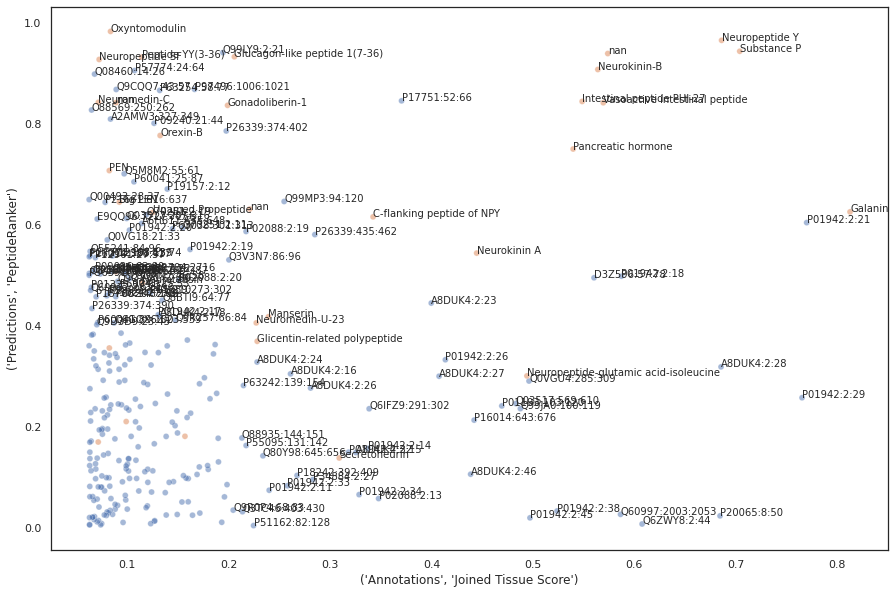

In [8]:
sns.set_style(style='white')
tissue_indexes = [slice(None)] + list(obs_data.index.levels[0])
df_out = obs_data.sort_values(by=[("Annotations", "Joined Tissue Score"), ("Predictions", "cv_f_logreg")])[::-1].droplevel(0)
# df_out = df_out.loc[~out_df.index.duplicated()]
df_out = df_out.loc[~df_out.index.duplicated()]
tissue_name = "All Tissues Combined"
tissue_index = slice(None)
        # 8_50

df_tissue = df_out.loc[tissue_index]
df_tissue["Annotations", "Joined Tissue Score"] = df_tissue["Annotations", "Joined Tissue Score"].astype(float)


plt.figure(figsize=(15,10))

data = df_tissue.nlargest(300,('Annotations', 'Joined Tissue Score'))
y = data[('Predictions', 'PeptideRanker')]
x = data[('Annotations', 'Joined Tissue Score')]
hue = data[('Annotations', 'Known')]
sns.scatterplot(x=x, y =y, hue=hue, alpha=0.5, legend=None)

for idx, row in data.iterrows():
    name = ':'.join([str(x) for x in row.name])
    if row['Annotations', 'Known']:
        name =  row['Annotations', 'Full Name']

    if row[('Annotations', 'Joined Tissue Score')]> 0.2:
        plt.text(row[('Annotations', 'Joined Tissue Score')], row[('Predictions', 'PeptideRanker')], name, size='small')
    elif row[('Predictions', 'PeptideRanker')] > 0.4:
        plt.text(row[('Annotations', 'Joined Tissue Score')], row[('Predictions', 'PeptideRanker')], name, size='small')


plt.savefig("figures/supplement/ppv_vs_peptideranker.png")
plt.savefig("figures/supplement/ppv_vs_peptideranker.svg")

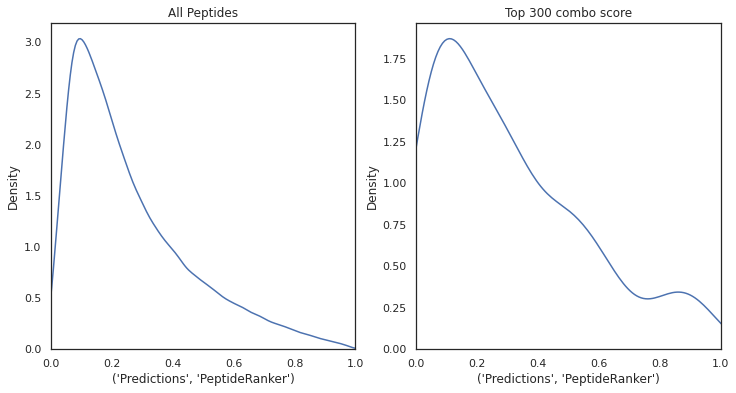

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True)
data = df_tissue.nlargest(300,('Annotations', 'Joined Tissue Score'))
sns.kdeplot(df_tissue['Predictions', 'PeptideRanker'], ax=ax[0])
ax[0].set_title('All Peptides')
ax[0].set_xlim((0,1))
sns.kdeplot(data['Predictions', 'PeptideRanker'], ax=ax[1])
ax[1].set_title('Top 300 combo score')

plt.savefig("figures/supplement/peptideranker_scores_distribution.png")
plt.savefig("figures/supplement/peptideranker_scores_distribution.svg")

In [6]:
uniprot_proteome = pd.read_csv('https://www.uniprot.org/uniprot/?query=&fil=reviewed%3Ayes%20AND%20organism%3A%22Mus%20musculus%20(Mouse)%20%5B10090%5D%22%20AND%20proteome%3Aup000000589&columns=id%2Centry%20name%2Creviewed%2Cprotein%20names%2Cgenes%2Clength%2Csequence&format=tab#', sep='\t')

In [7]:
from tqdm.auto import tqdm
import random

lengths = obs_data['Annotations', 'Sequence'].str.len()
random_peptides = []
for l in tqdm(lengths):

    # retrying is much faster than prefiltering length.
    # sample_space = uniprot_proteome.loc[uniprot_proteome['Length']>l]
    found = False
    while not found:
        protein_seq = uniprot_proteome.sample(1).iloc[0]['Sequence']
        if len(protein_seq)<l:
            continue
        pep_start = random.randint(0, len(protein_seq)-l)
        random_peptides.append(protein_seq[pep_start:pep_start+l])
        found=True

random_df = pd.DataFrame(random_peptides, columns=['Sequence'])

  0%|          | 0/217902 [00:00<?, ?it/s]

In [10]:
from get_peptideranker_preds import get_peptide_rank

from pandarallel import pandarallel
import pandas as pd
pandarallel.initialize(nb_workers=12, progress_bar=False)
random_df['PeptideRanker'] = random_df['Sequence'].parallel_apply(get_peptide_rank)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [13]:
random_df.to_csv('random_peptideranker_peptides_tempsave.csv')

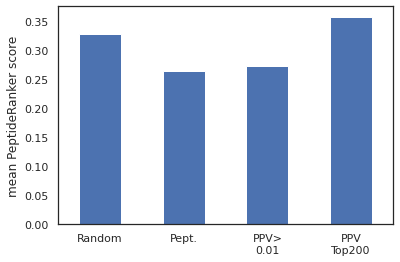

In [12]:
# •	Randomly sampling sequences from the entire proteome (all of uniprot) with a length distribution similar to that of the peptidomics data set. For instance, randomly pick a peptide from our MS data set, compute length L, randomly select a protein, randomly select a starting position (ending at or before the last amino acid), copy the next L amino acids as a virtual peptide, compute PeptideRanker score, Compute average score.
# •	All 150,000 peptides observed in our MS data
# •	Peptides with PPV > 0.01 across all tissues (individual scores, not combo)
# •	Top200 Peptides from PPV across all tissue (individual score, not combo)

random_predicted = random_df['PeptideRanker'].sum() / len(random_df)

all_predicted = obs_data['Predictions', 'PeptideRanker'].sum() / len(obs_data)

sub_df = obs_data.loc[obs_data['Predictions', 'cv_f_logreg']>0.01]
high_predicted = sub_df['Predictions', 'PeptideRanker'].sum() / len(sub_df)

sub_df = obs_data.nlargest(200, ('Predictions', 'cv_f_logreg'))
top_predicted = sub_df['Predictions', 'PeptideRanker'].sum() / len(sub_df)


pd.Series({'Random':random_predicted,'Pept.': all_predicted, 'PPV>\n0.01': high_predicted, 'PPV\nTop200':top_predicted}).plot(kind='bar', rot=0)
plt.ylabel('mean PeptideRanker score')
plt.savefig("figures/supplement/peptideranker_scores_grouped.png")
plt.savefig("figures/supplement/peptideranker_scores_grouped.svg")

In [15]:
proteome_secreted = len(uniprot_proteome_secreted)/len(uniprot_proteome) *100
peptidome_secreted = obs_data['Annotations', 'Secreted'].sum() / len(obs_data) *100

sub_df = obs_data.loc[obs_data['Predictions', 'cv_f_logreg']>0.01]
high_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100


sub_df = obs_data.nlargest(200, ('Predictions', 'cv_f_logreg'))
top_secreted = sub_df['Annotations', 'Secreted'].sum() / len(sub_df) *100


pd.Series({'Prot.': proteome_secreted, 'Pept.': peptidome_secreted, 'PPV>\n0.01': high_secreted, 'PPV\nTop200':top_secreted}).plot(kind='bar', rot=0)


campaign_id     protein_id  start  stop
Mouse Ileum     P47212      33     61      0.657311
Mouse pancreas  Q60997      2003   2053    0.586554
Mouse Scfat     P01942      2      29      0.572448
Mouse Epifat    P01942      2      21      0.565111
Mouse Brain     P55099      82     91      0.564164
                                             ...   
Mouse pancreas  P81117      25     43      0.053849
Mouse Ileum     Q03517      527    566     0.053811
Mouse pancreas  P63028      163    172     0.053572
Mouse Scfat     P01942      2      8       0.053572
Mouse Epifat    P01942      2      30      0.053496
Name: (Predictions, cv_f_logreg), Length: 300, dtype: float64

In [39]:
def to_yes_no(selector):
    series = pd.Series("No", index=selector.index)
    series[selector] = "Yes"
    return series


def to_mq_sequence(df):
    seq = '_'
    if df["Is Acetylated"] == 'Yes':
        seq += '(ac)'
    seq += df["Sequence"] + '_'
    if df["Is Amidated"]:
        seq += '(am)'
    return seq


def top_ppv():
    "assumes sorted list!"
    peptides = set()
    
    def _top_ppv(series):
        pep_id = series.name[1:]
        if pep_id in peptides:
            return "No"
        peptides.add(pep_id)
        return "Yes"
    return _top_ppv
    

with pd.ExcelWriter('figures/paper/ppv.xlsx') as writer:  
    df_out = obs_data.sort_values(by=("Predictions", "cv_f_logreg"))[::-1]
    
    # make main sheet
    df_sheet1 = df_out["Annotations"].copy()
    df_sheet1["cv_f_logreg"] = df_out['Predictions', 'cv_f_logreg']
    df_sheet1['PeptideRanker'] = df_out['Predictions', 'PeptideRanker']
    df_sheet1["Highest PPV"] = df_out["Annotations"].apply(top_ppv(), axis=1)
    
    df_sheet1.loc[:, "Is Amidated"] = to_yes_no(df_out["MS Frequency", "amidation"] > 0.05)
    df_sheet1.loc[:, "Is Acetylated"] = to_yes_no(df_out["MS Frequency", "acetylation"] > 0.05)
    df_sheet1.loc[:, "Secreted"] = to_yes_no(df_sheet1["Secreted"])
    df_sheet1.loc[:, " LPV"] = to_yes_no(df_sheet1["LPV"])
    df_sheet1.loc[:, "MQ Sequence"] = df_sheet1.apply(to_mq_sequence, axis=1)
    df_sheet1["Peptide Name"] = "TODO"
    df_sheet1["Protein Name"] = "TODO"
    df_sheet1["Known Uniprot 2020_1"] = "TODO"
    df_sheet1["Best PPV"] = "TODO"
    del df_sheet1["Cluster"]
    
    df_sheet1 = df_sheet1.reset_index()
    output_names_sheet1 = {
        "campaign_id": "Tissue", "protein_id": "Uniprot Accession number",
        "start": "Peptide Start", "stop": "Peptide Stop",
        "N Flanking": "N-Terminal Flanking", "C Flanking": "C-Terminal Flanking",
        "Known": "Known Uniprot 2018_1", "cv_f_logreg": "PPV Score",
        #"Conservation": "Conservation to Human"
    }
    df_sheet1.rename(columns = output_names_sheet1, inplace = True)
    columns = ["PPV Score", "Uniprot Accession number", "Peptide Start", "Peptide Stop", "Sequence", "MQ Sequence", "Protein Name", "Peptide Name", 
               "N-Terminal Flanking", "C-Terminal Flanking",  "Tissue", "Highest PPV", "Known Uniprot 2018_1", "Known Uniprot 2020_1", "Best PPV", 
               "Secreted", #"Conservation to Human", 
               "Is Amidated", "Is Acetylated", "Intensity", "LPV", "PeptideRanker"]
    df_sheet1 = df_sheet1[columns]
#     df_sheet1.to_excel(writer, sheet_name='Peptide Predictions', index=False)
    df_sheet1.head(10000).to_excel(writer, sheet_name='Peptide Predictions', index=False)
    
    # sheet 2 Features
#     df_out.drop(columns="Annotations").to_excel(writer, sheet_name='Peptide Features')
    df_out.drop(columns="Annotations").head(10000).to_excel(writer, sheet_name='Peptide Features')

/novo/users/fegt/miniconda3/envs/peplm/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
